In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import lightgbm as lgb
from scipy import stats

In [2]:
# Add the facets overview python code to the python path
import sys
sys.path.append('./python')

---
## Data Preparation

In [3]:
# Load UCI census train and test data into dataframes.
import pandas as pd
features = ['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition']
train_data = pd.read_csv(
    "./data/train.csv",
    sep=r'\s*,\s*',
    engine='python',
    na_values="?")
test_data = pd.read_csv(
    "./data/test.csv",
    names=features,
    sep=r'\s*,\s*',
    skiprows=[0],
    engine='python',
    na_values="?")

In [4]:
## Changing Data into String for Categorical Analysis
transform_col = ['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
                 ## Date Related
                 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']
for col in transform_col:
    train_data[col] = train_data[col].astype('str')
    test_data[col] = test_data[col].astype('str')
    
## Aggregating together for whole view analysis
all_data = pd.concat([train_data, test_data])

---
## Basic Data Study

In [5]:
# Calculate the feature statistics proto from the datasets and stringify it for use in facets overview
from generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import base64

gfsg = GenericFeatureStatisticsGenerator()
proto = gfsg.ProtoFromDataFrames([{'name': 'ALL', 'table': all_data}
                                  ])
protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")

# Display the facets overview visualization for this data
from IPython.core.display import display, HTML

HTML_TEMPLATE = """<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

---
## Correlation Analysis

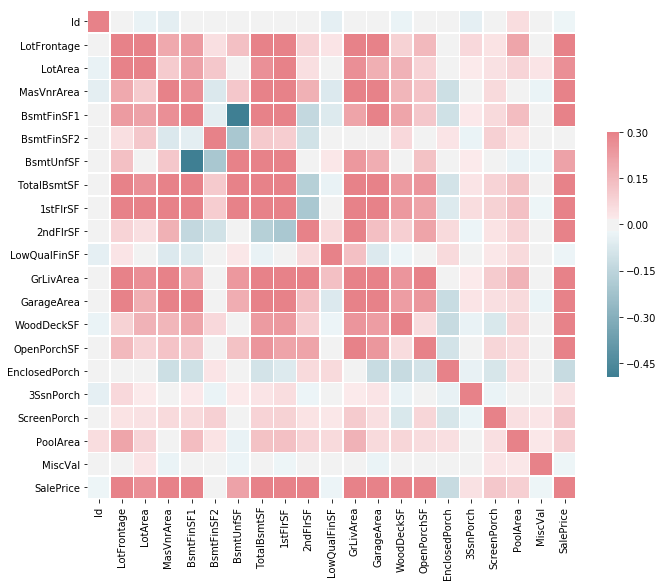

In [6]:
## Correlation Analysis
corr = train_data.corr()

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

---
## Detail relationship study between target variable (SalePrice) and input features

LotFrontage


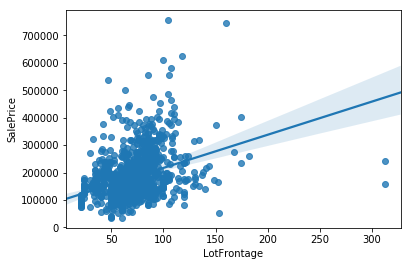

LotArea


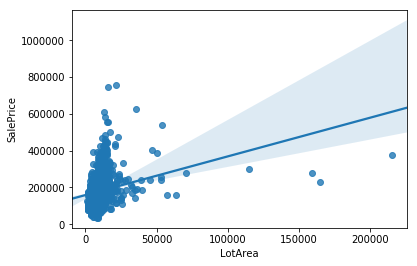

MasVnrArea


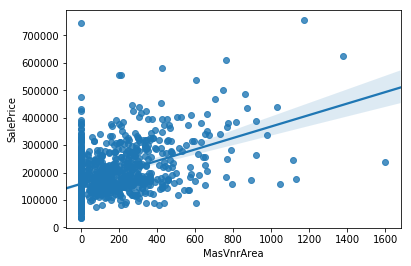

BsmtFinSF1


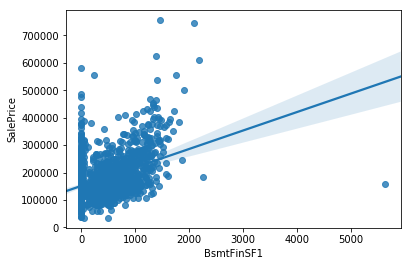

BsmtFinSF2


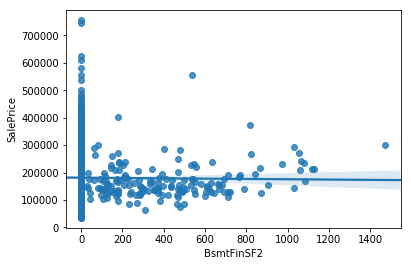

BsmtUnfSF


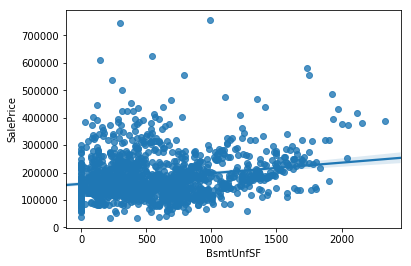

TotalBsmtSF


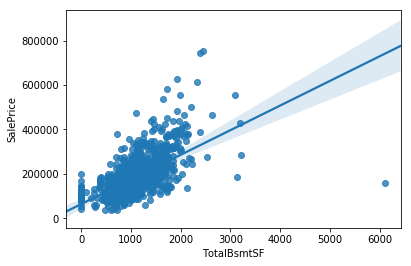

1stFlrSF


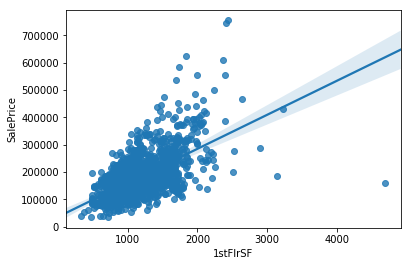

2ndFlrSF


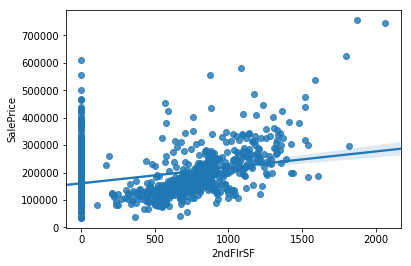

LowQualFinSF


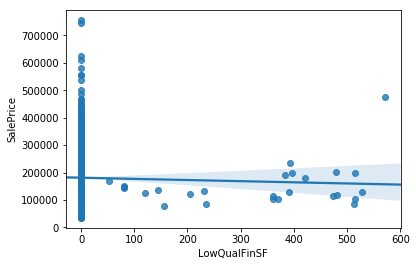

GrLivArea


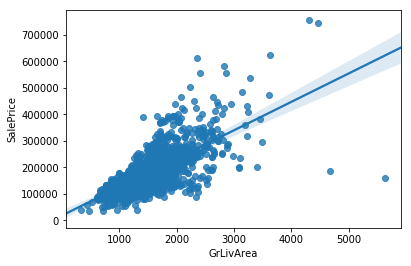

GarageArea


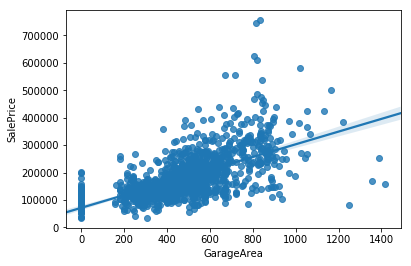

WoodDeckSF


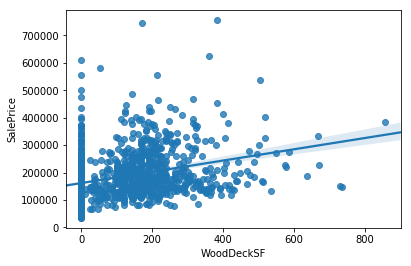

OpenPorchSF


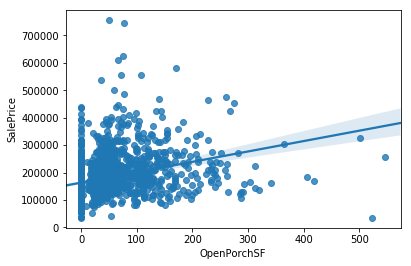

EnclosedPorch


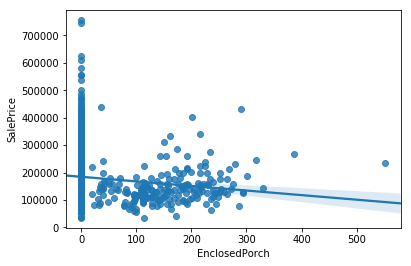

3SsnPorch


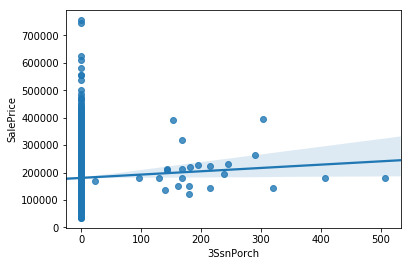

ScreenPorch


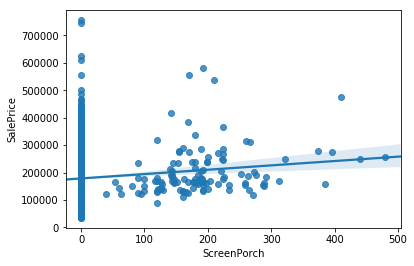

PoolArea


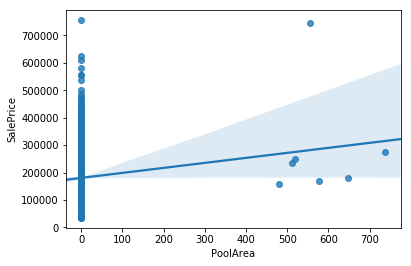

MiscVal


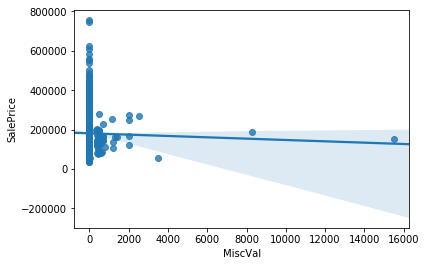

In [7]:
for col, dtype in train_data.dtypes[1:-1].items():
    if(dtype != 'object'):
        print(col)
        sns.regplot(x=col, y="SalePrice", data=train_data,dropna=True)
        plt.show()

MSSubClass


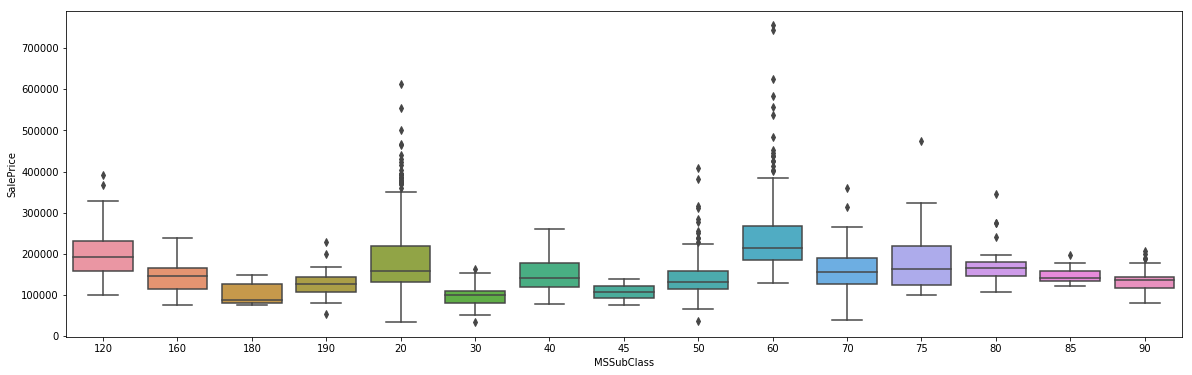

MSZoning


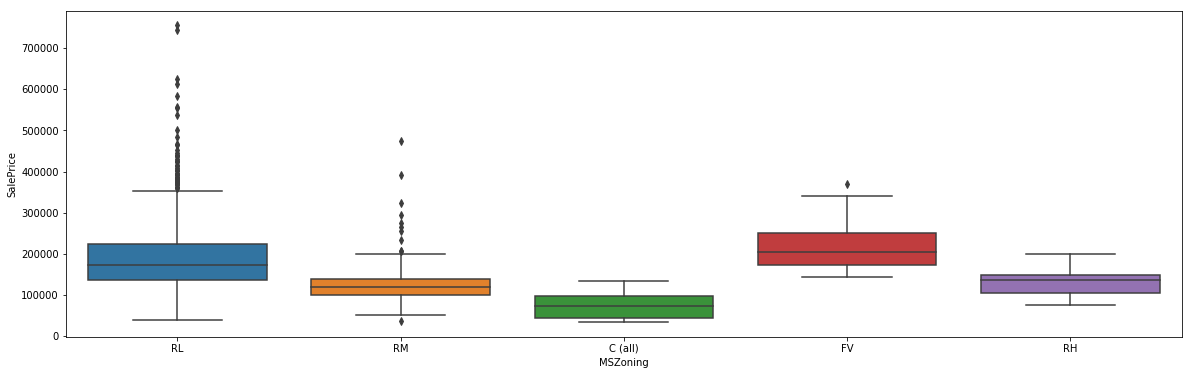

Street


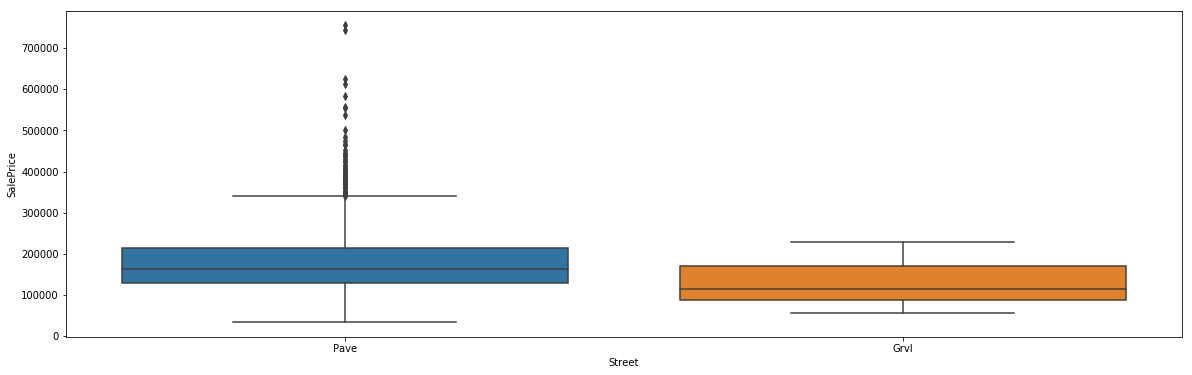

Alley


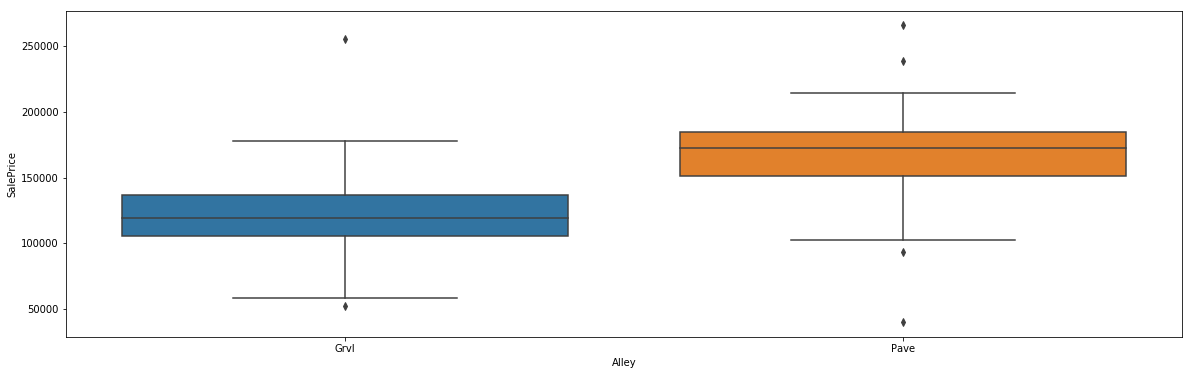

LotShape


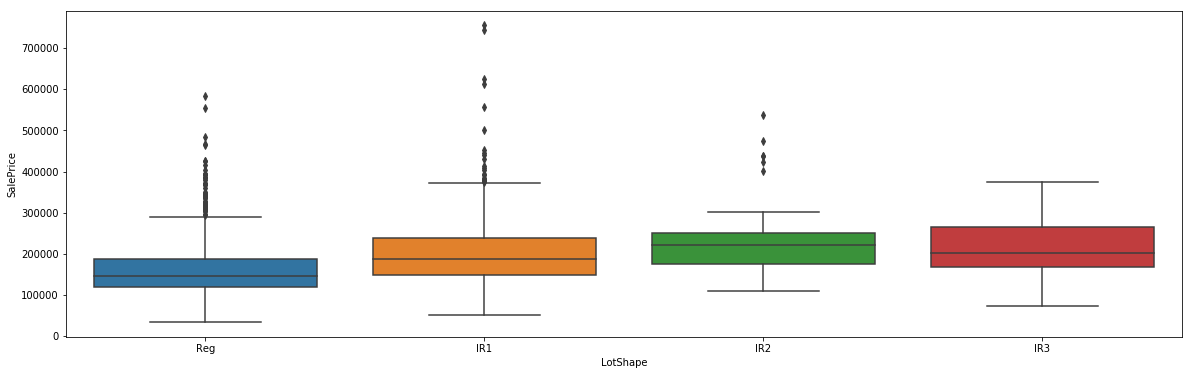

LandContour


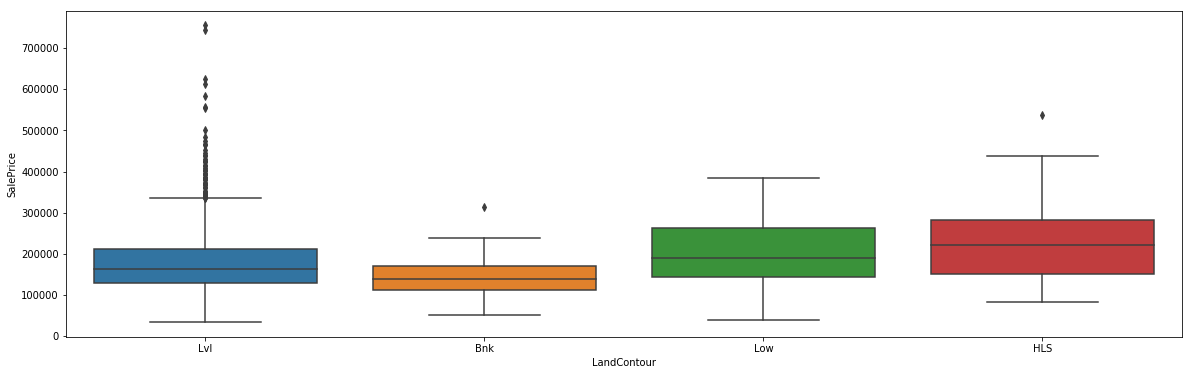

Utilities


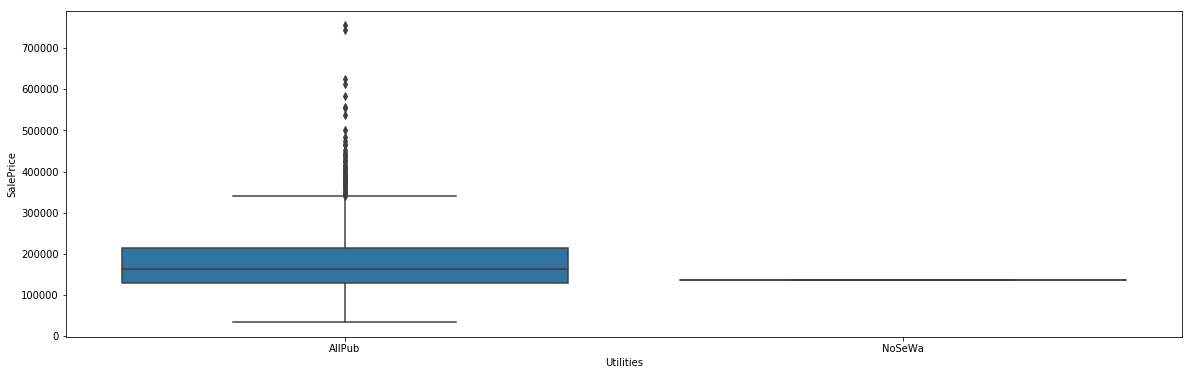

LotConfig


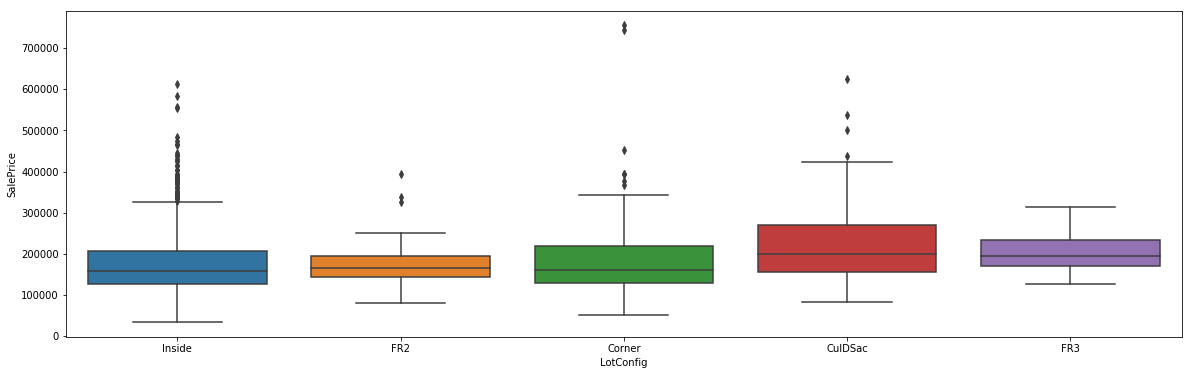

LandSlope


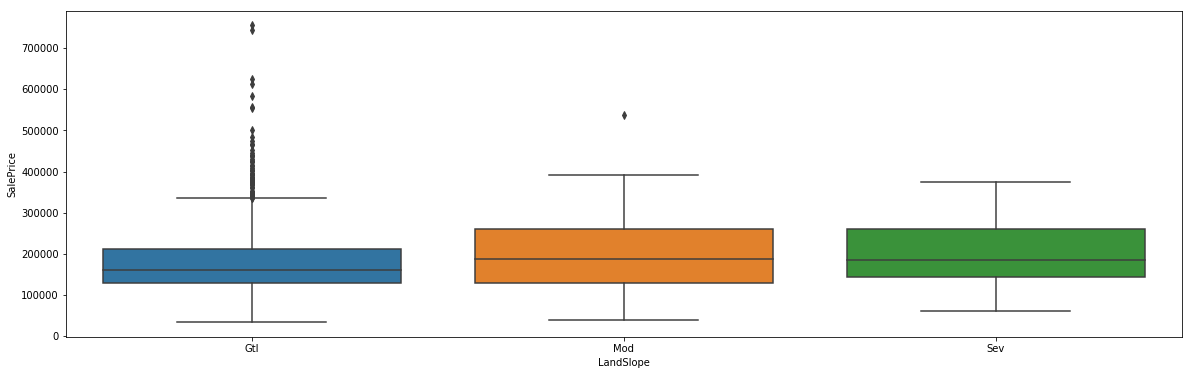

Neighborhood


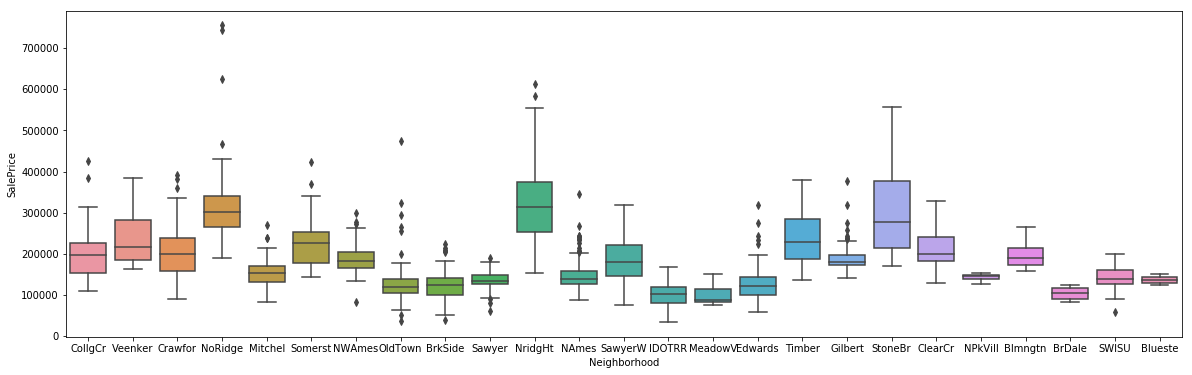

Condition1


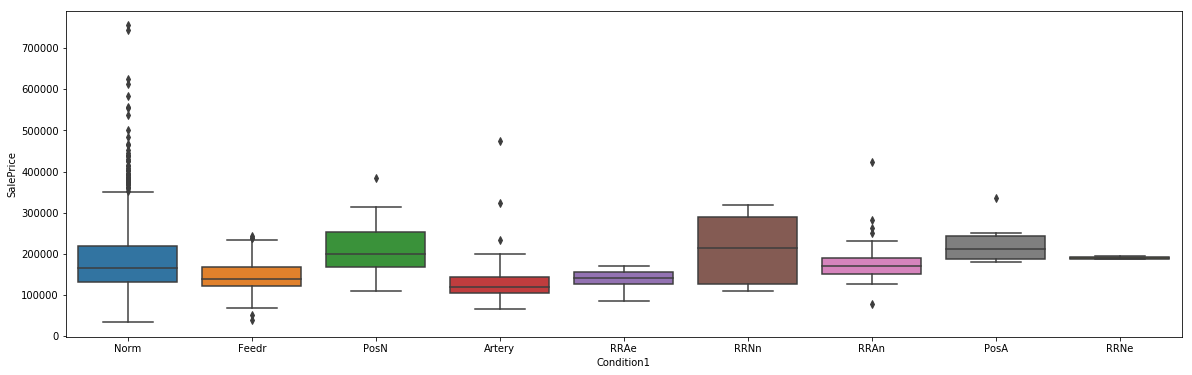

Condition2


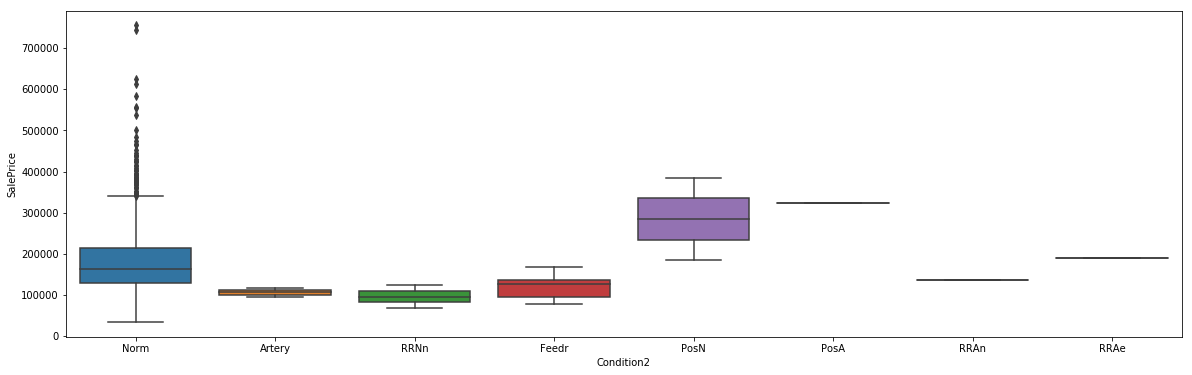

BldgType


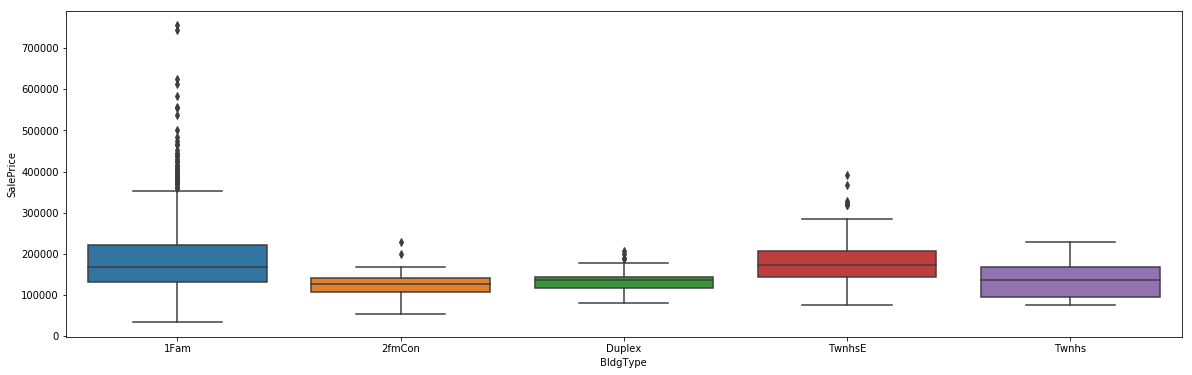

HouseStyle


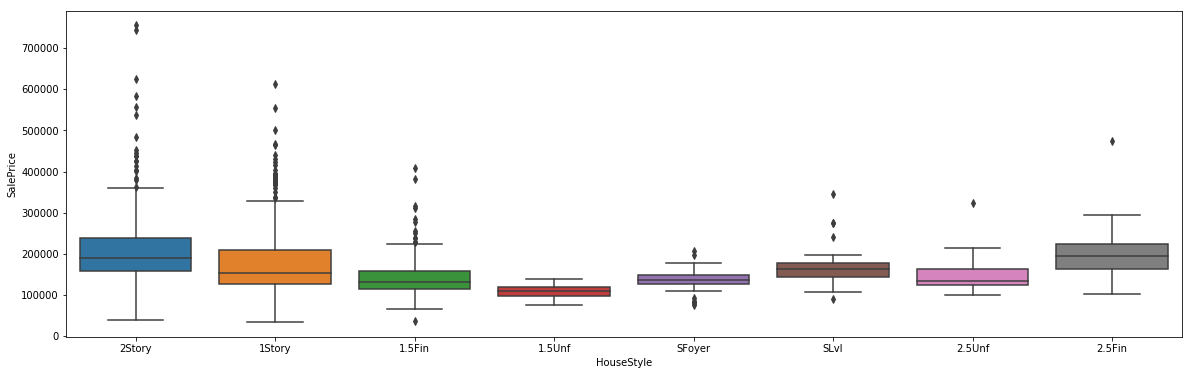

OverallQual


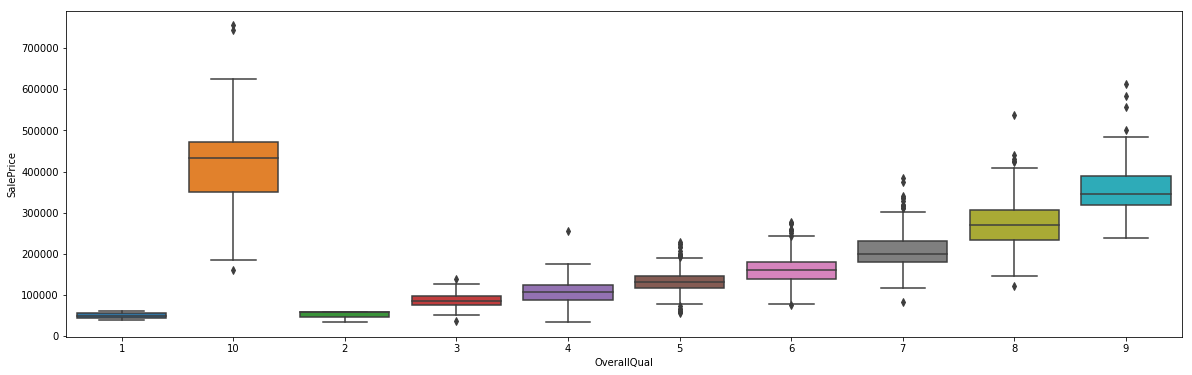

OverallCond


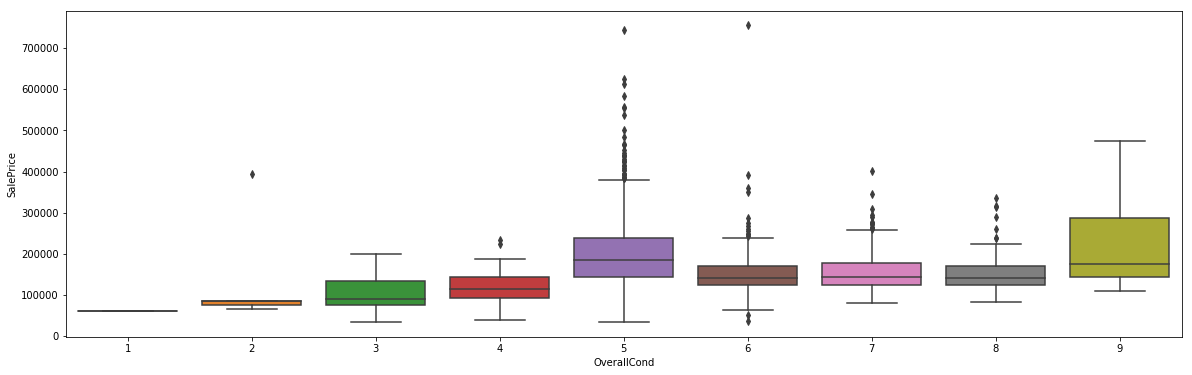

YearBuilt


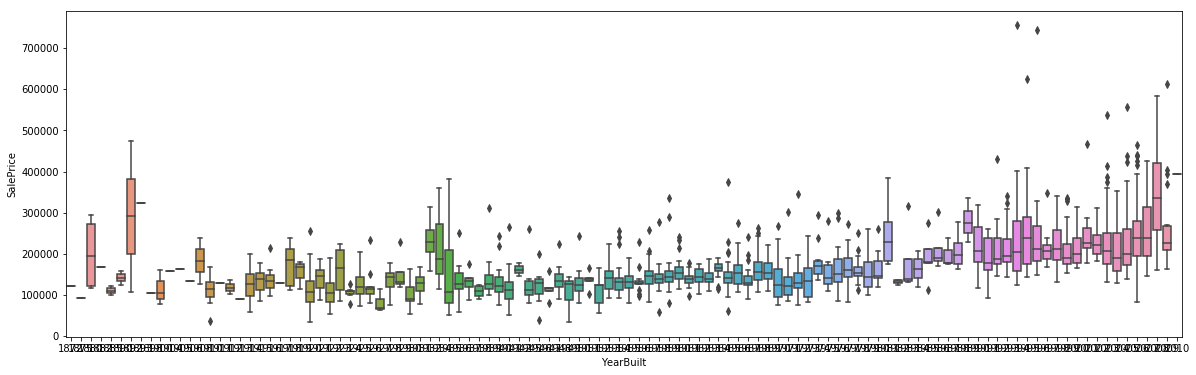

YearRemodAdd


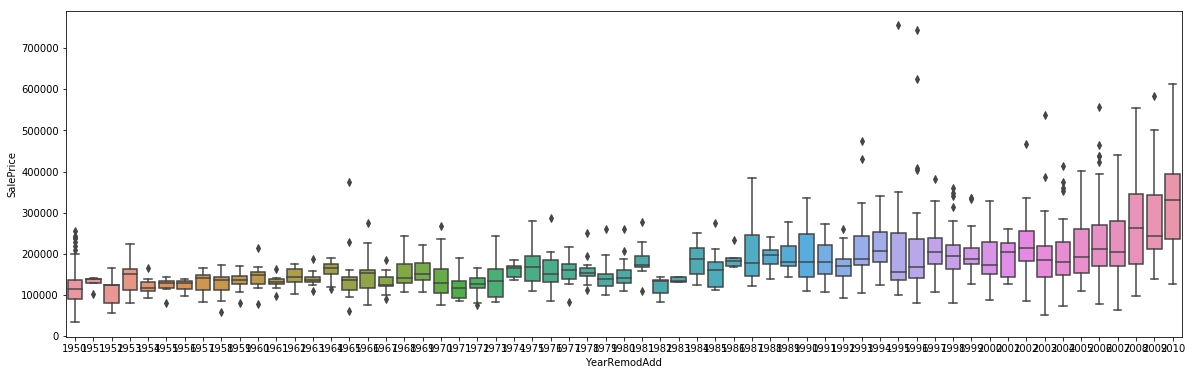

RoofStyle


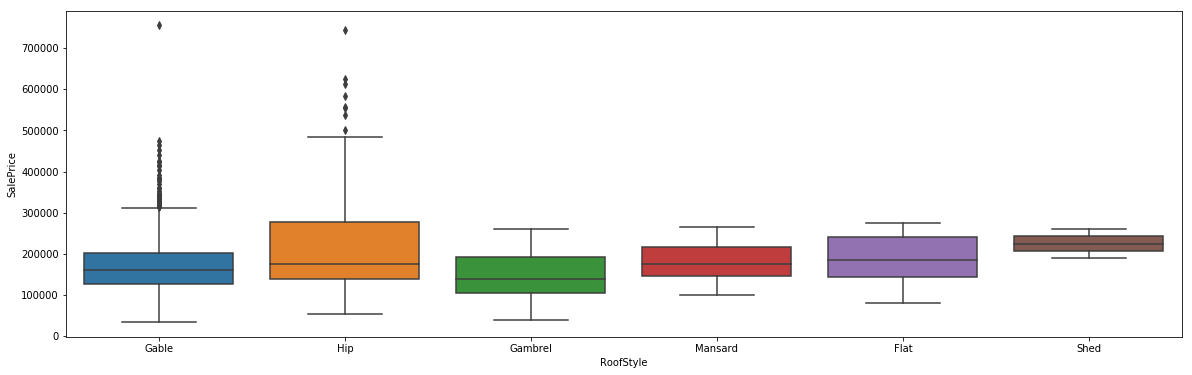

RoofMatl


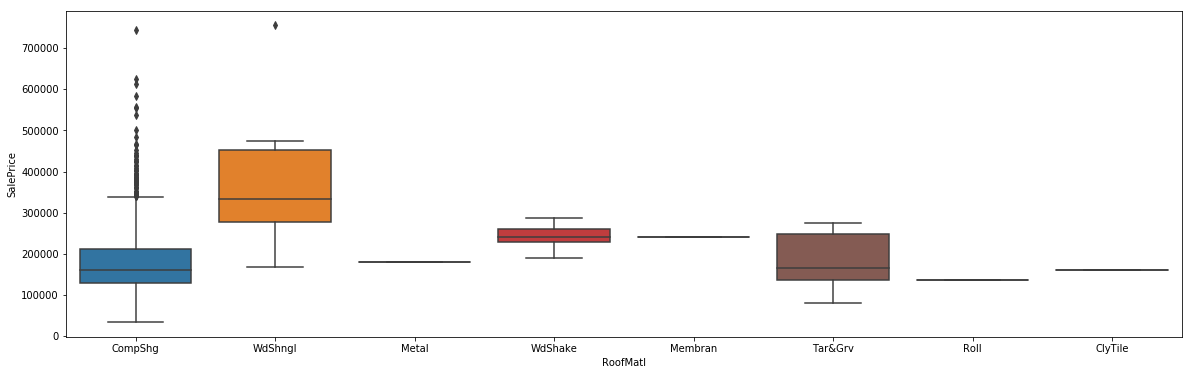

Exterior1st


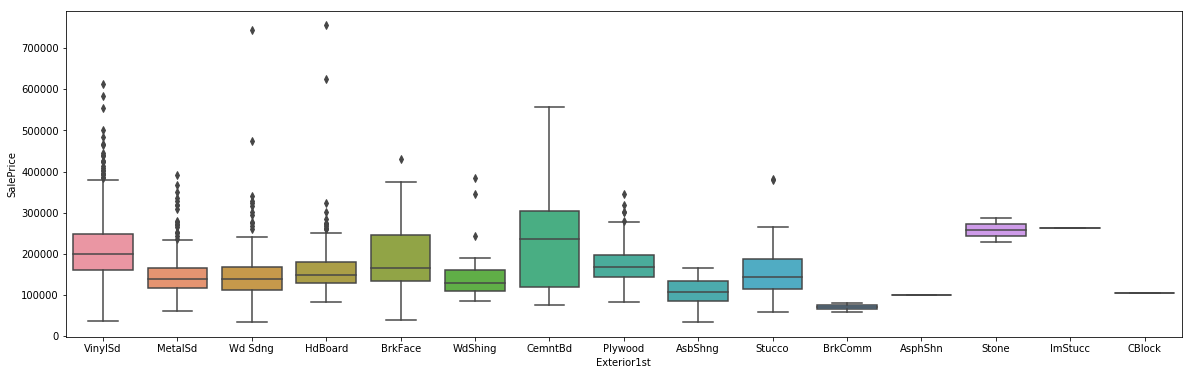

Exterior2nd


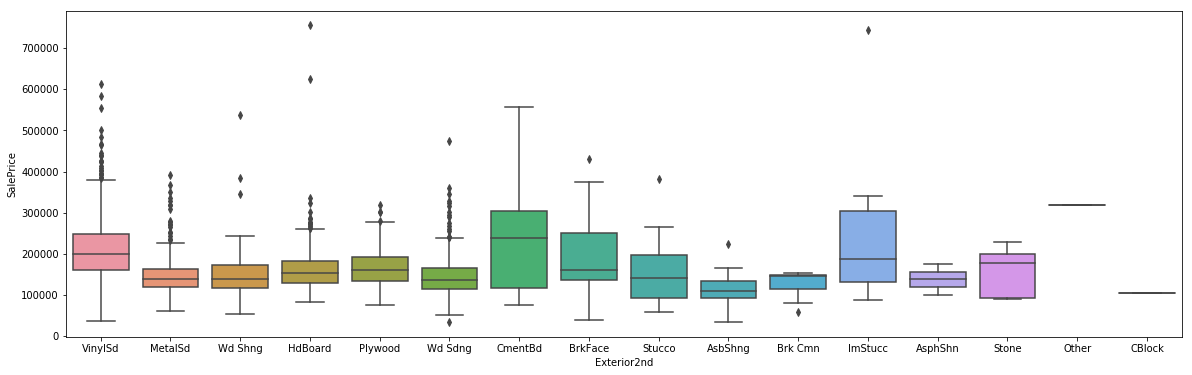

MasVnrType


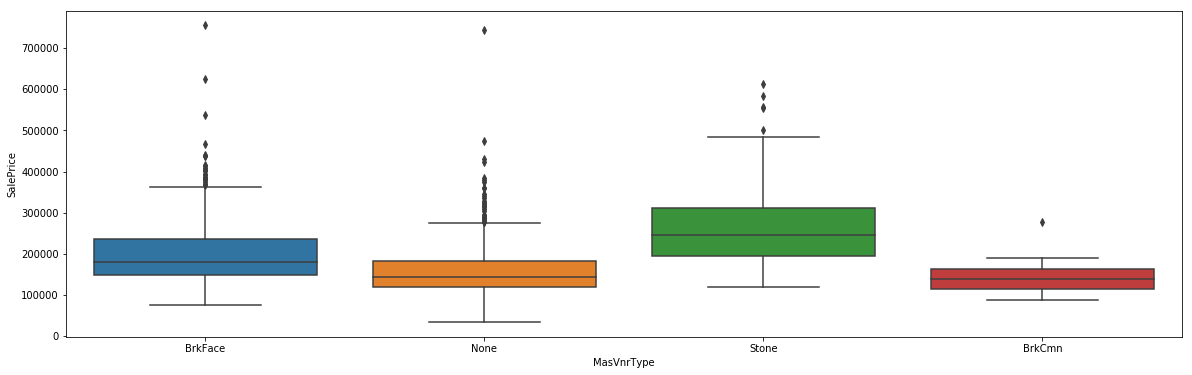

ExterQual


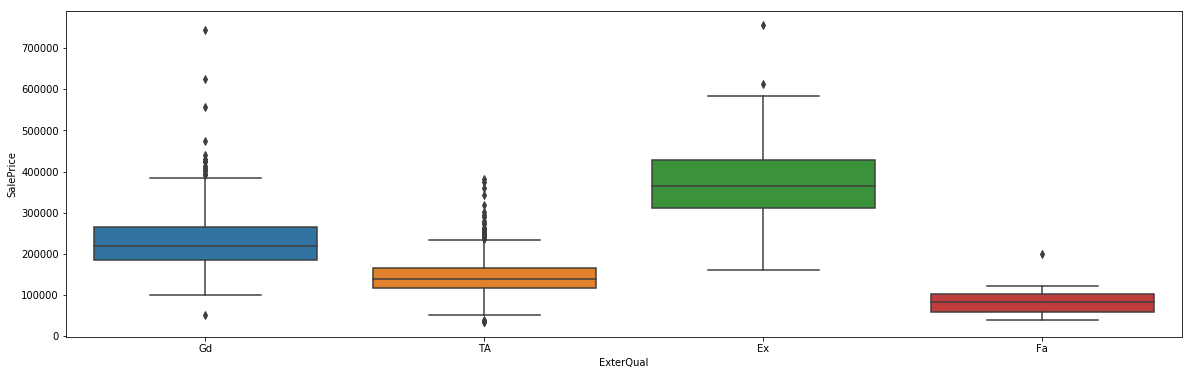

ExterCond


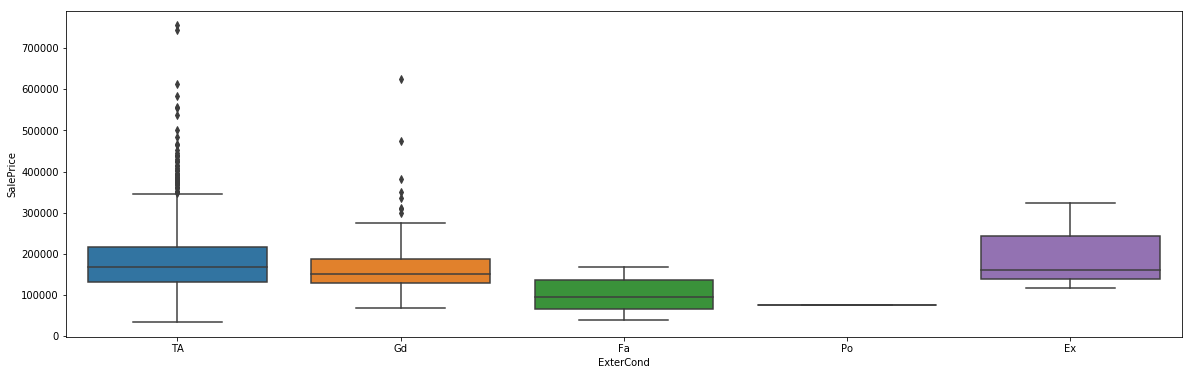

Foundation


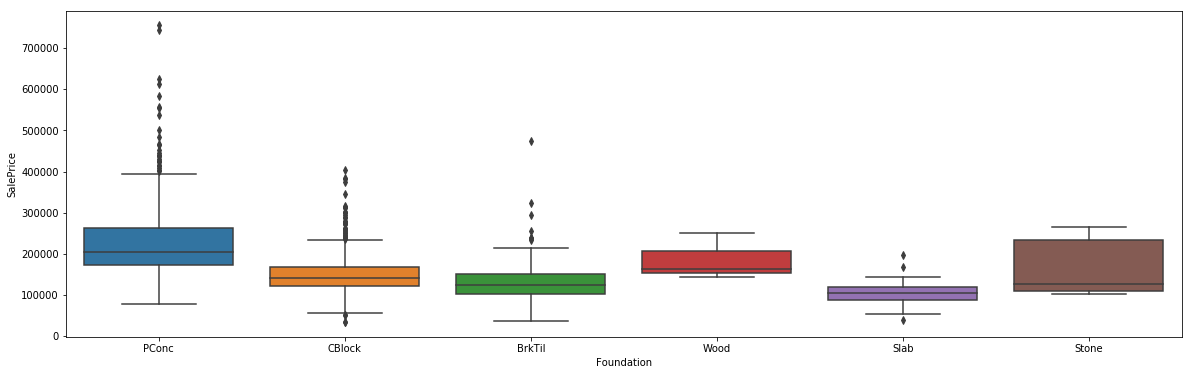

BsmtQual


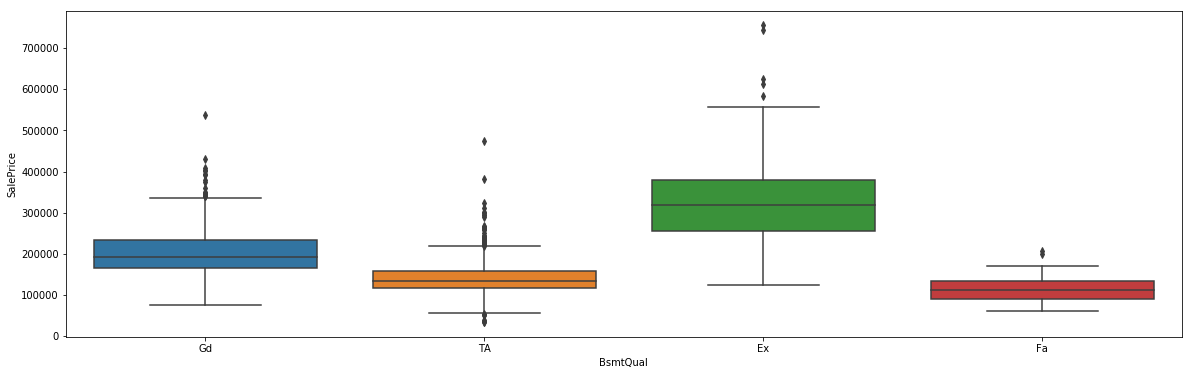

BsmtCond


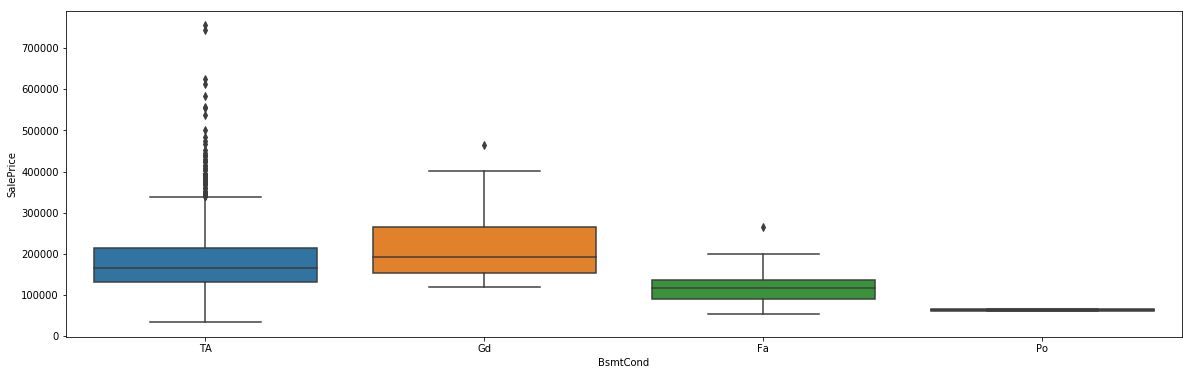

BsmtExposure


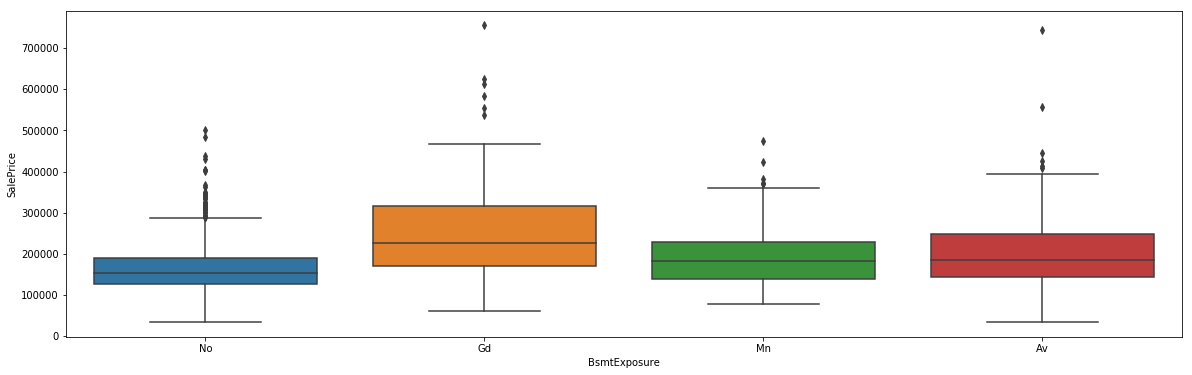

BsmtFinType1


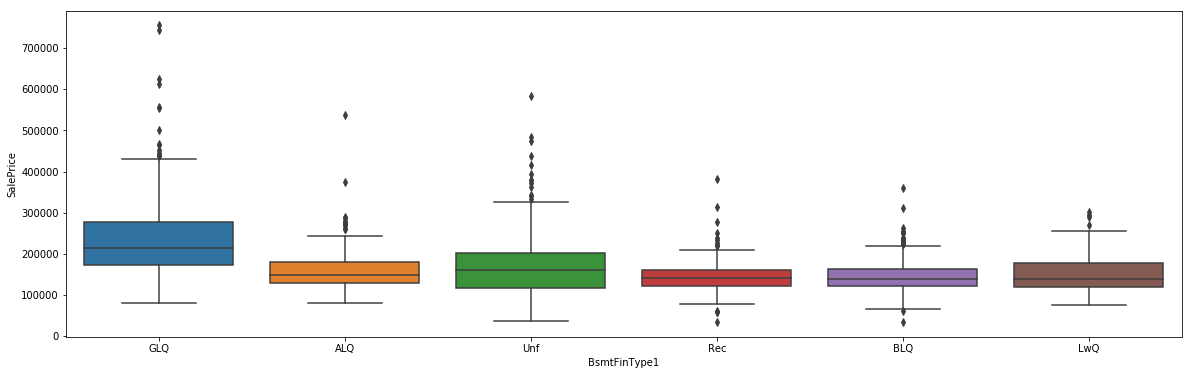

BsmtFinType2


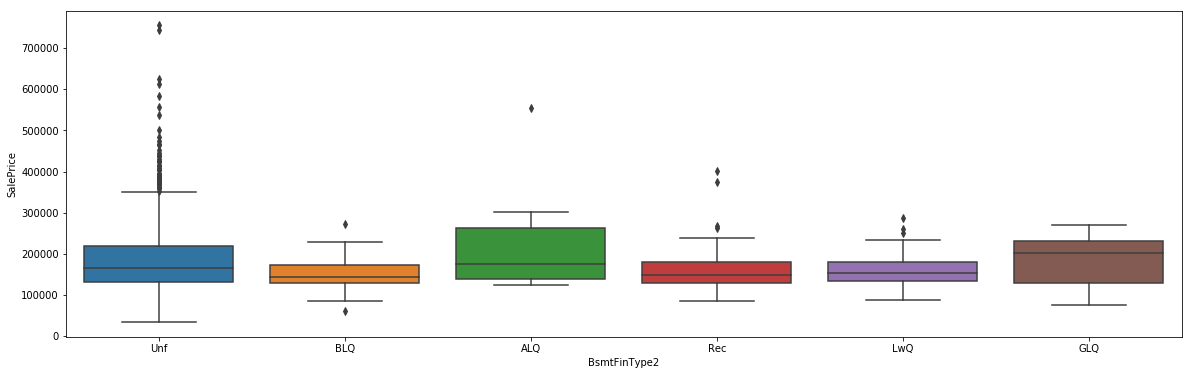

Heating


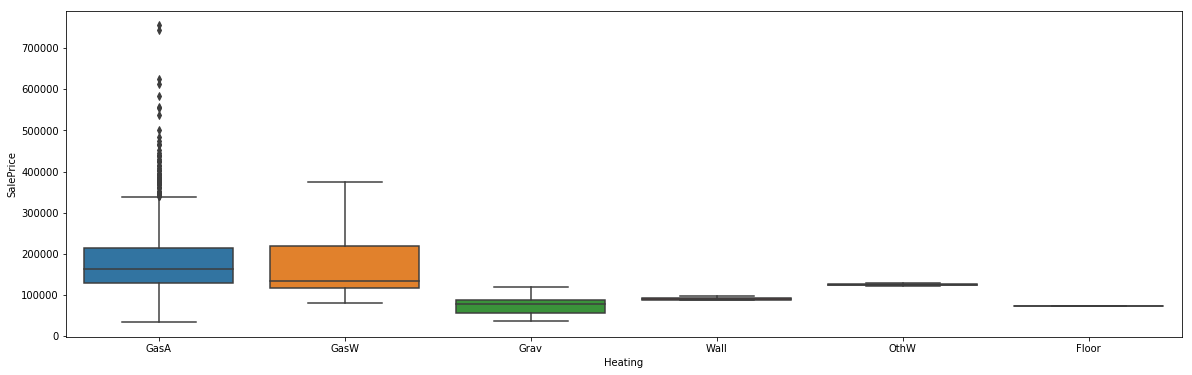

HeatingQC


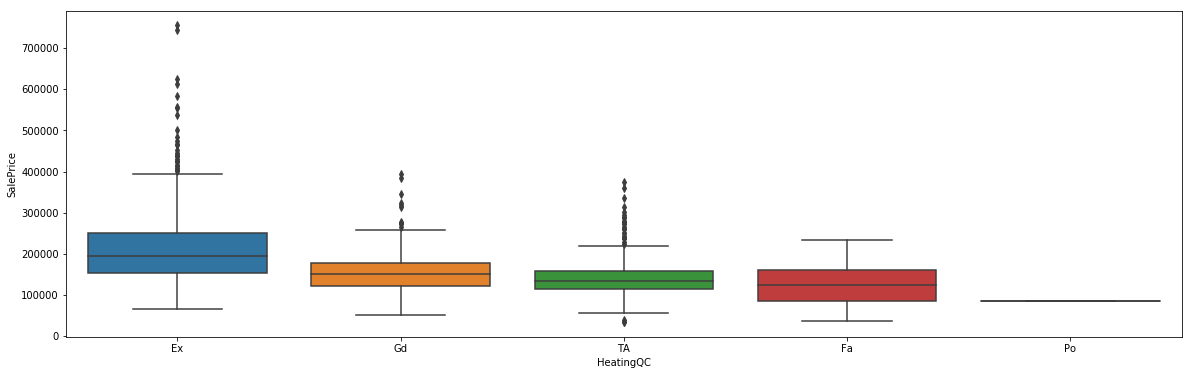

CentralAir


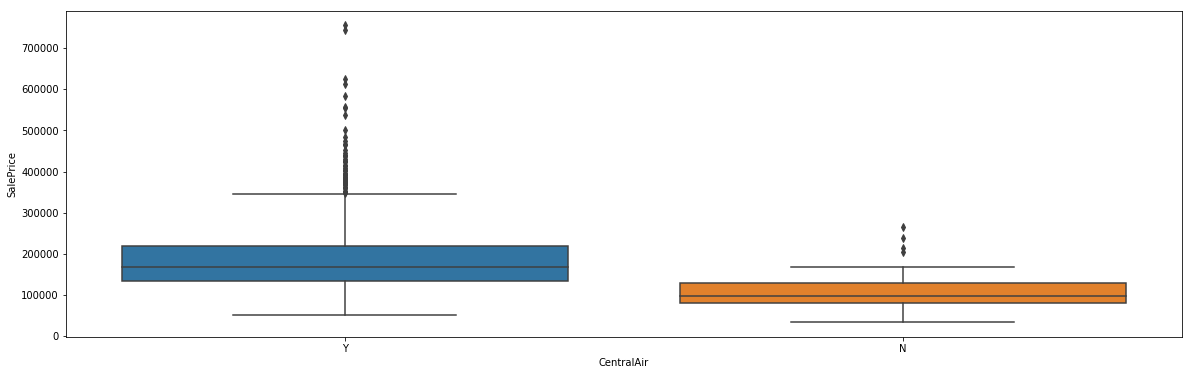

Electrical


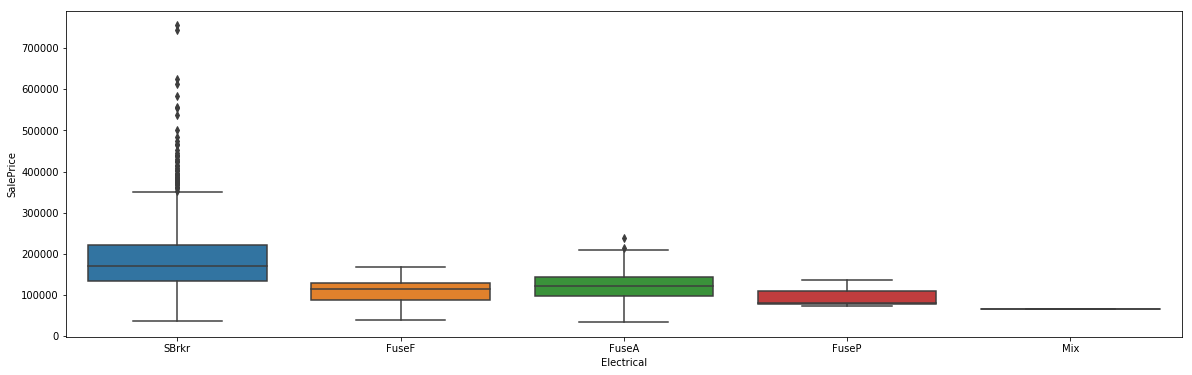

BsmtFullBath


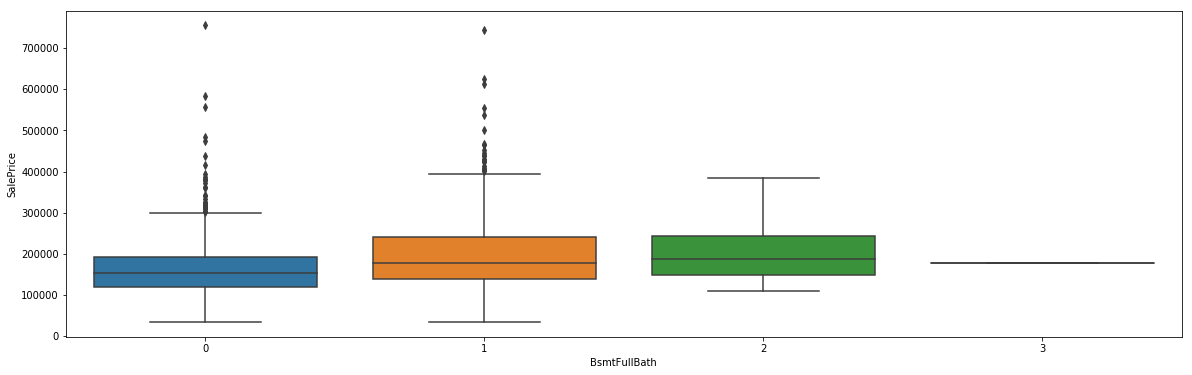

BsmtHalfBath


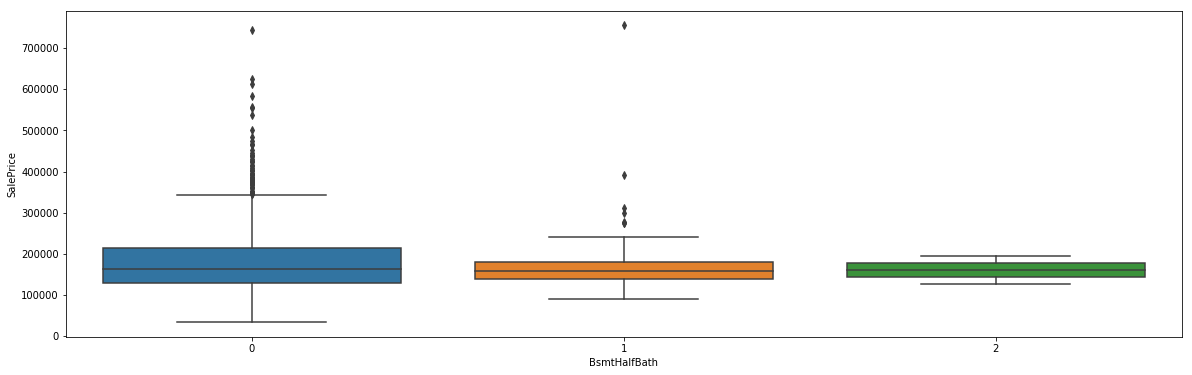

FullBath


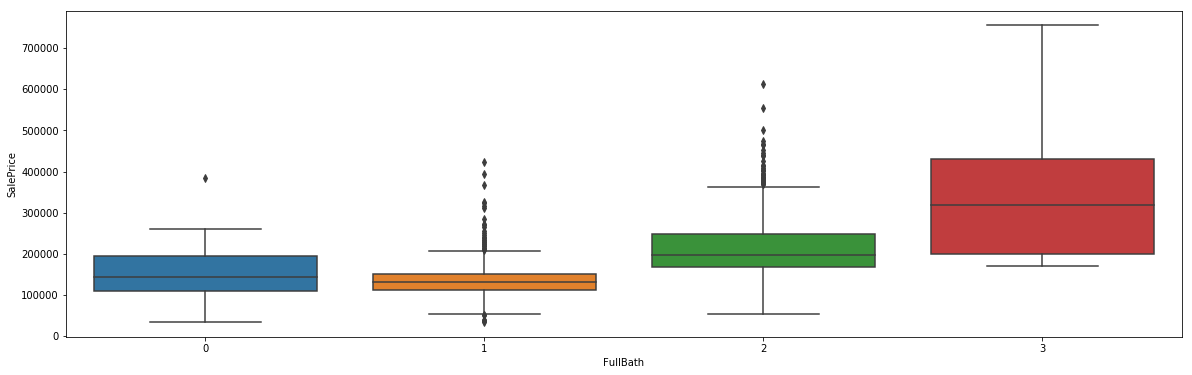

HalfBath


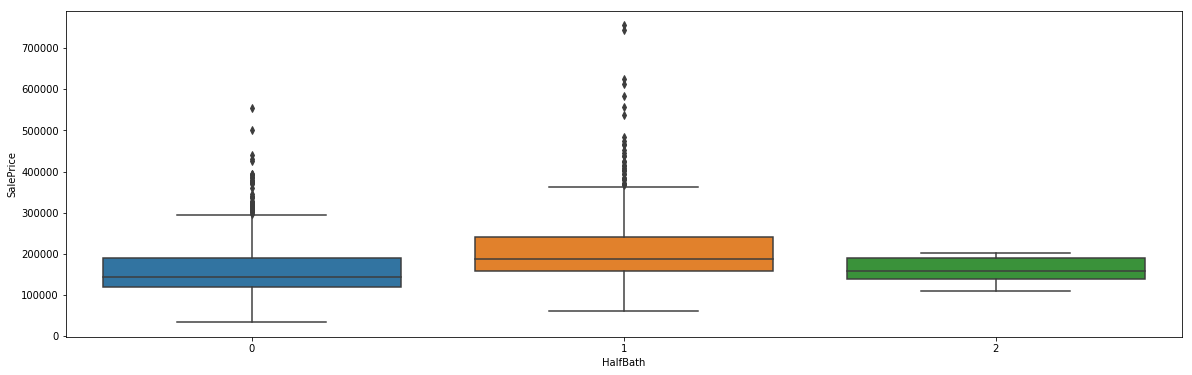

BedroomAbvGr


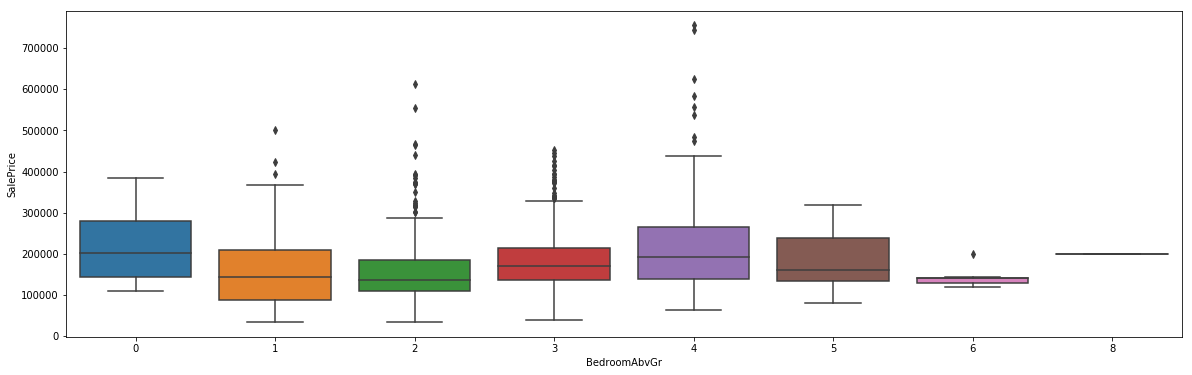

KitchenAbvGr


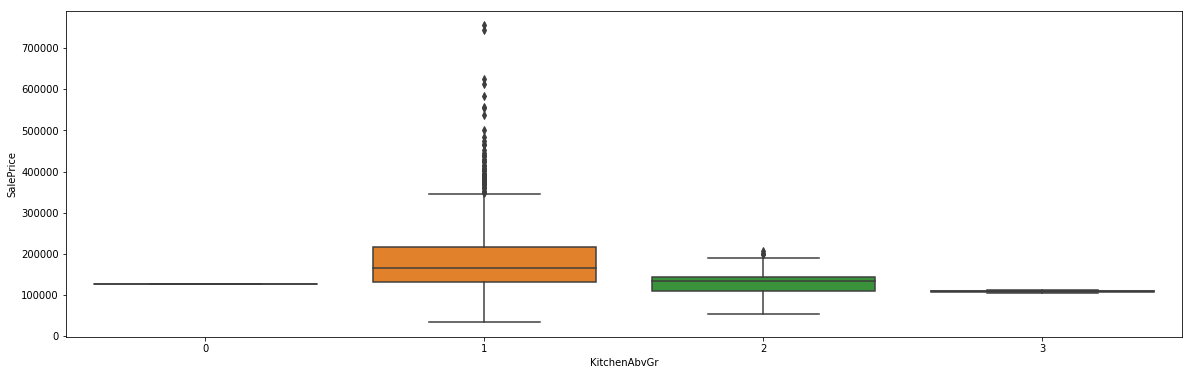

KitchenQual


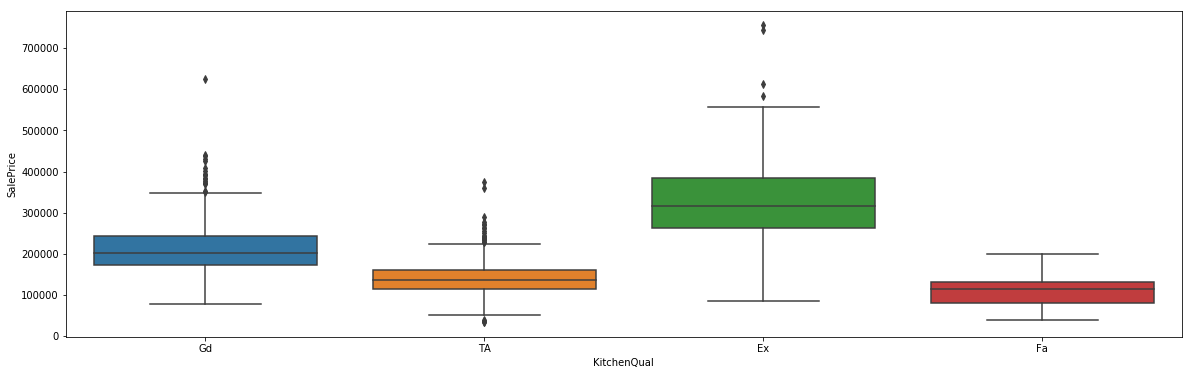

TotRmsAbvGrd


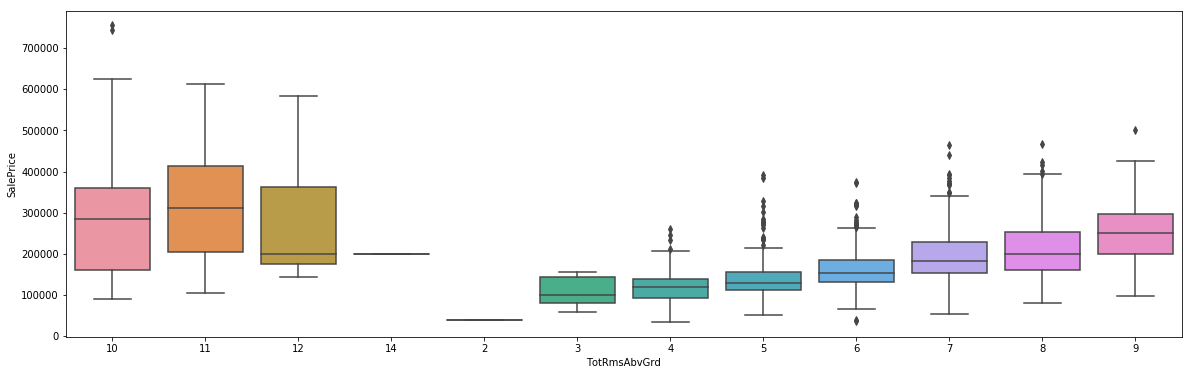

Functional


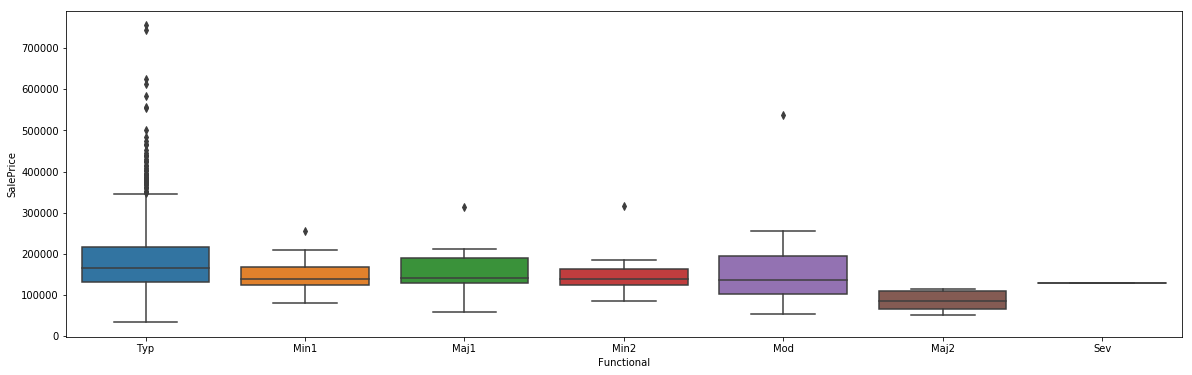

Fireplaces


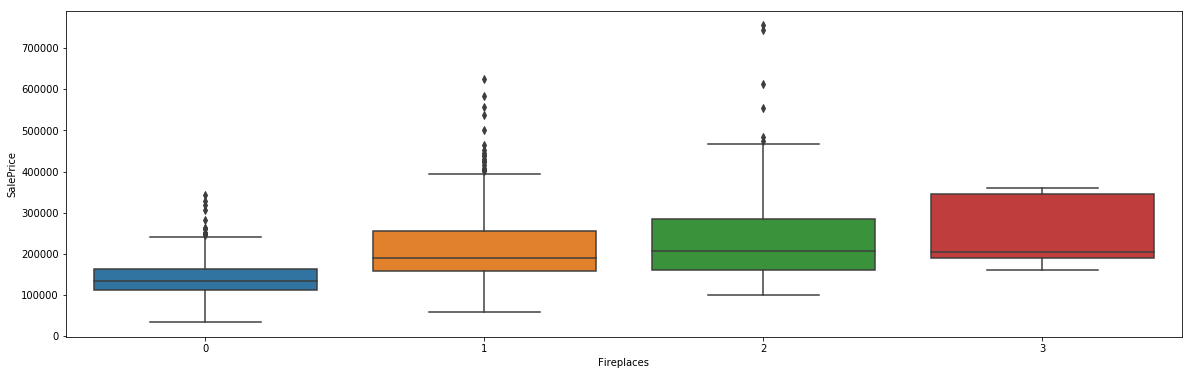

FireplaceQu


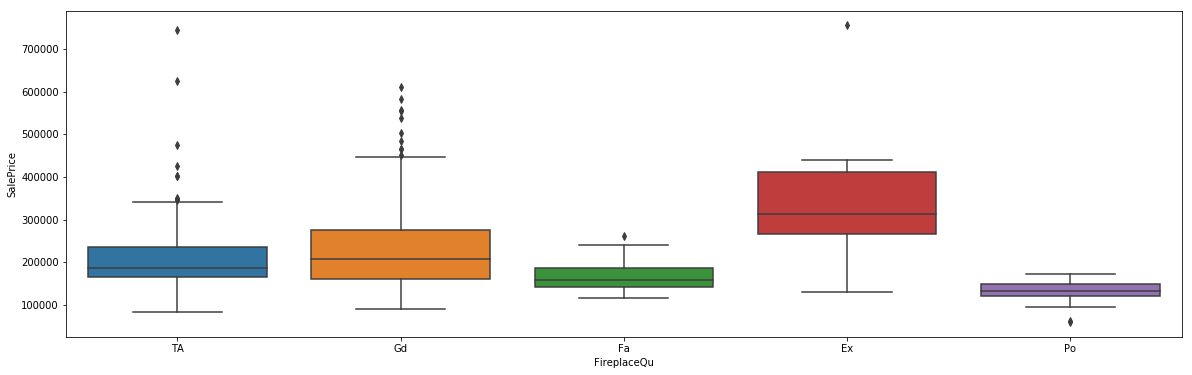

GarageType


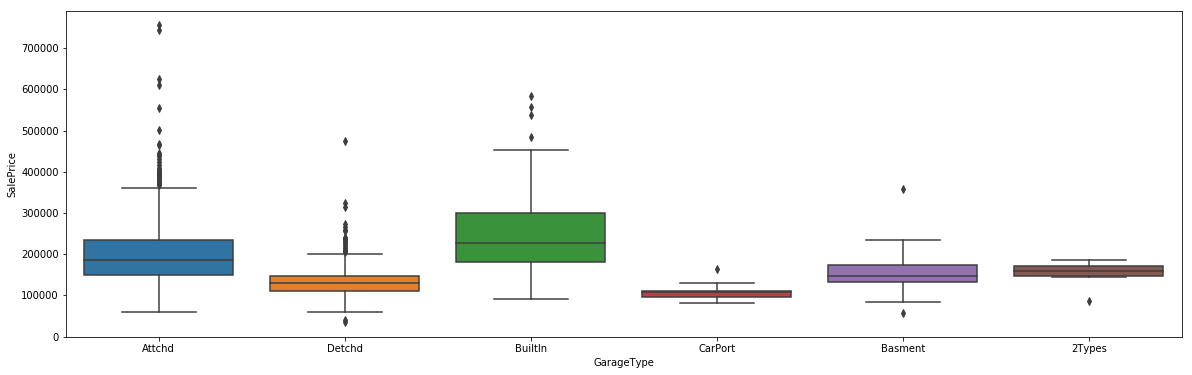

GarageYrBlt


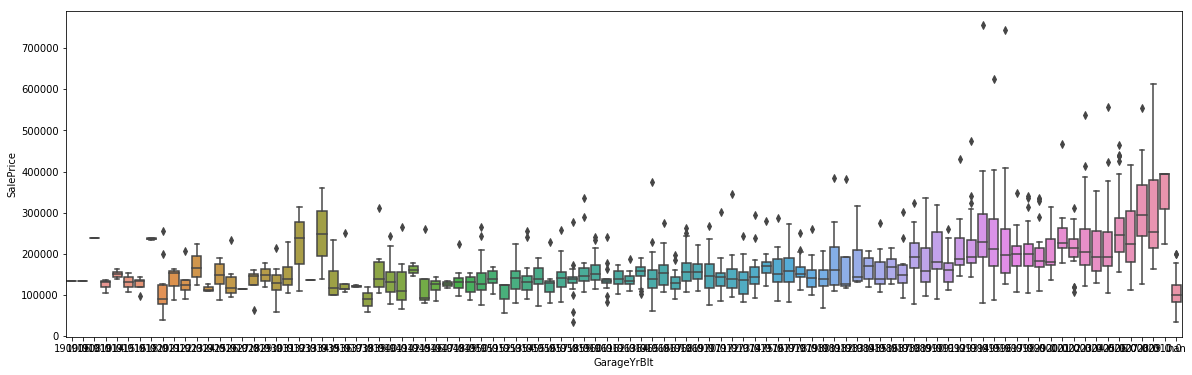

GarageFinish


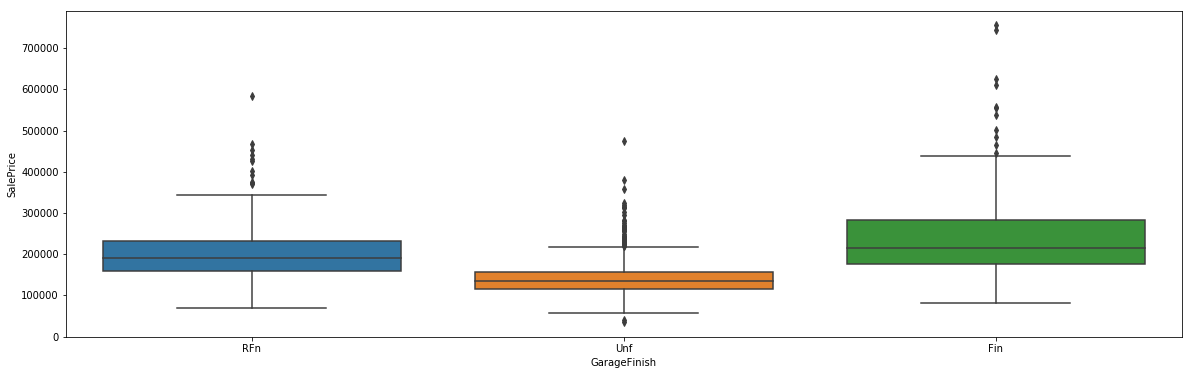

GarageCars


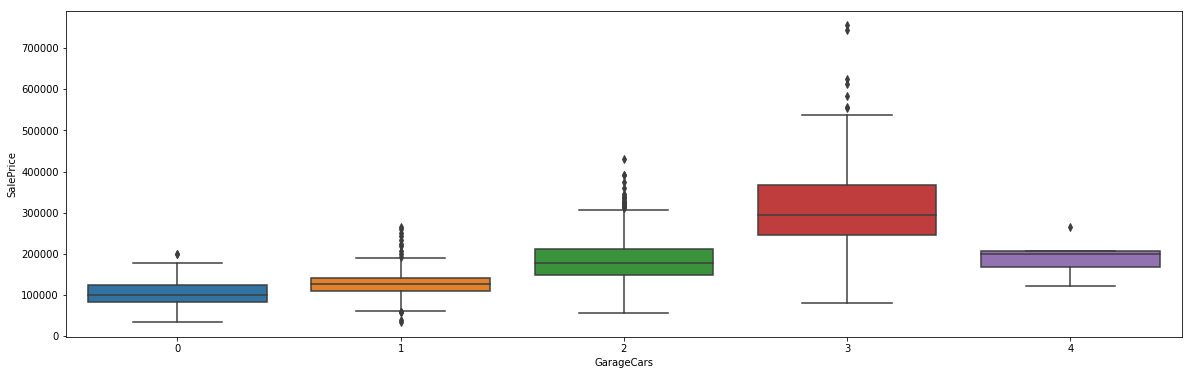

GarageQual


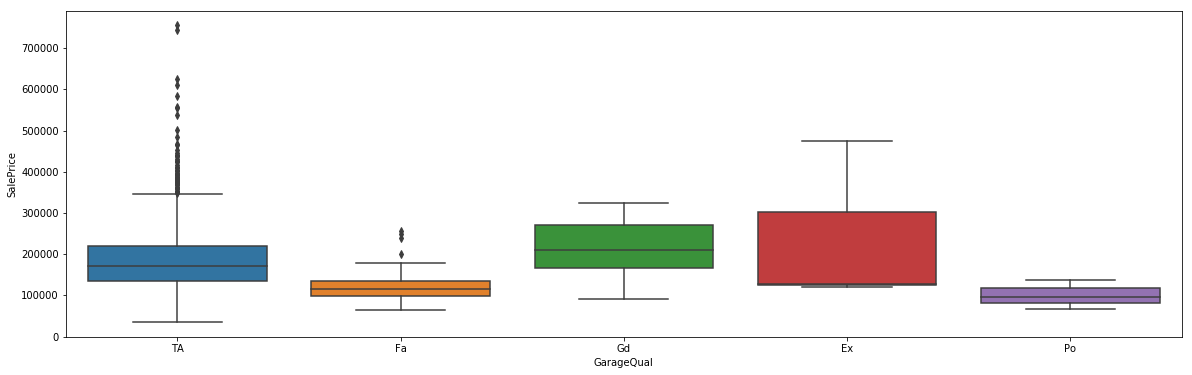

GarageCond


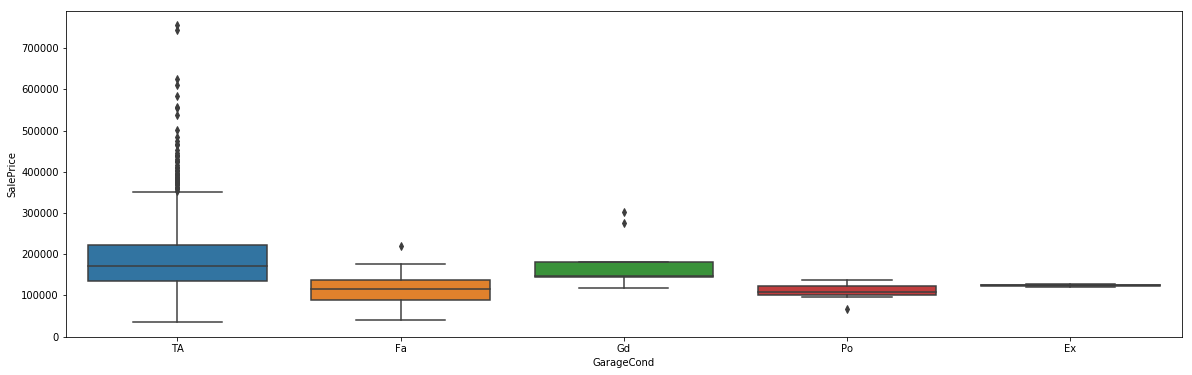

PavedDrive


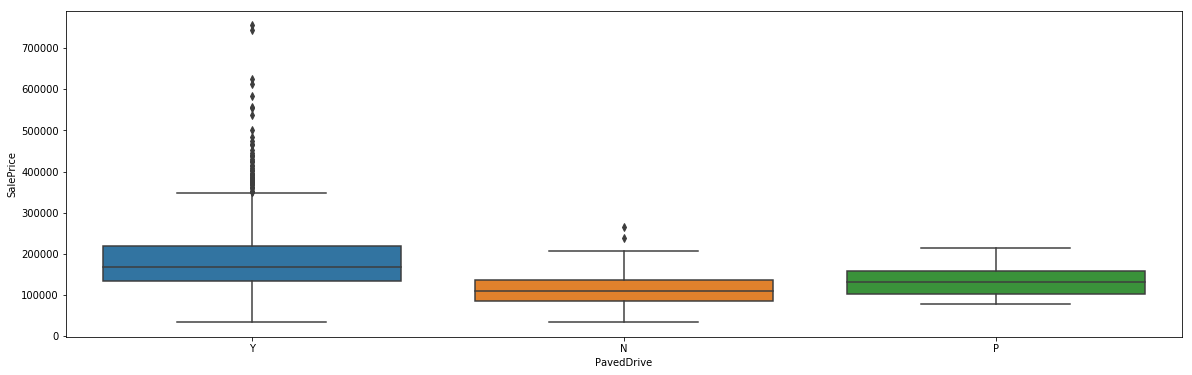

PoolQC


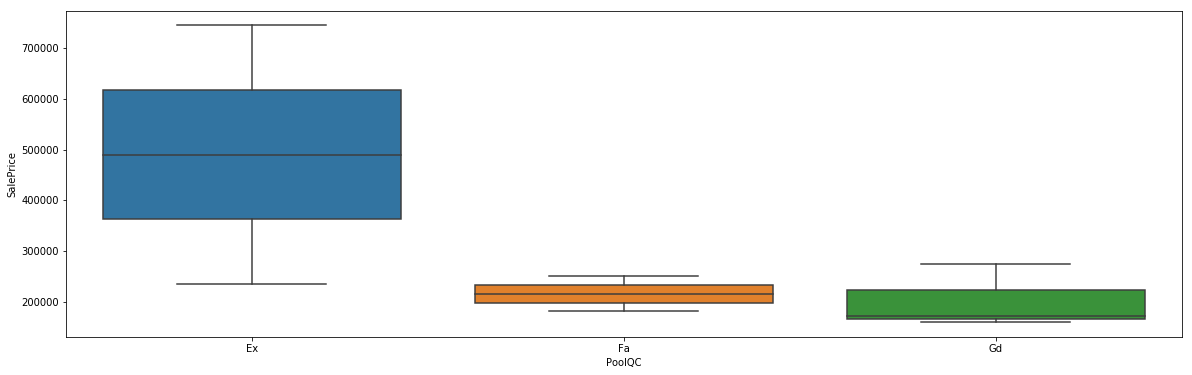

Fence


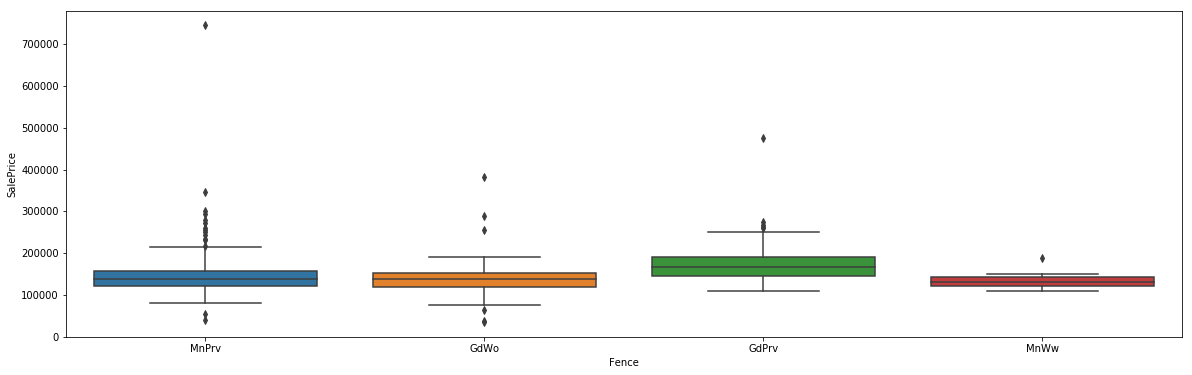

MiscFeature


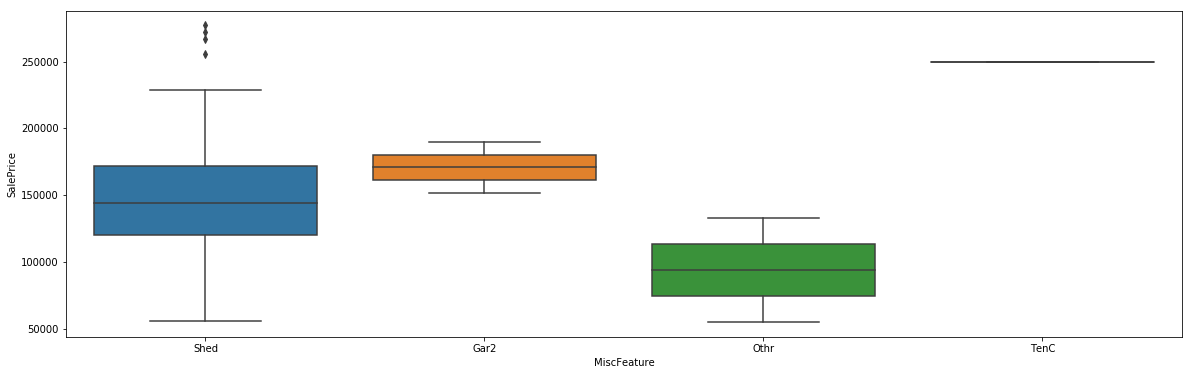

MoSold


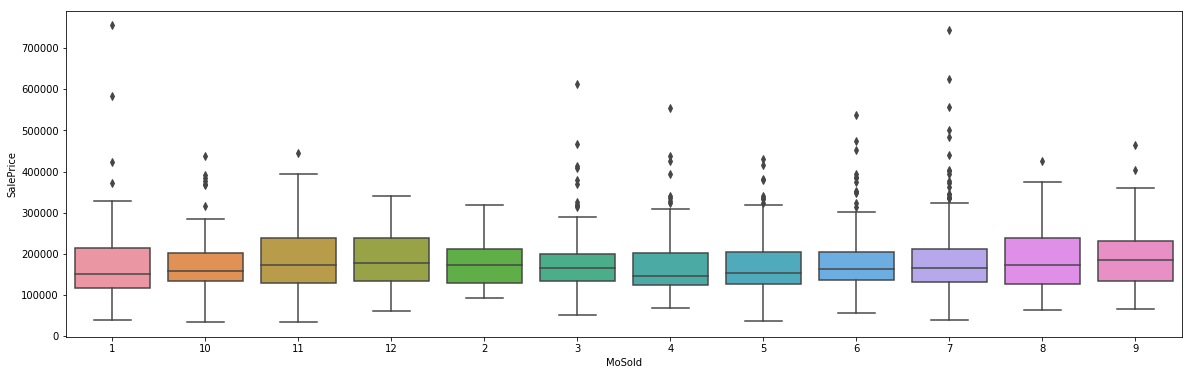

YrSold


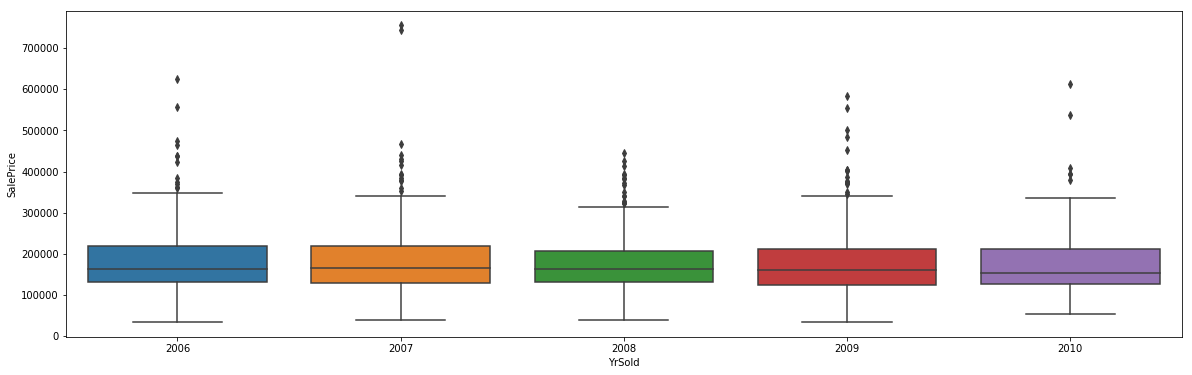

SaleType


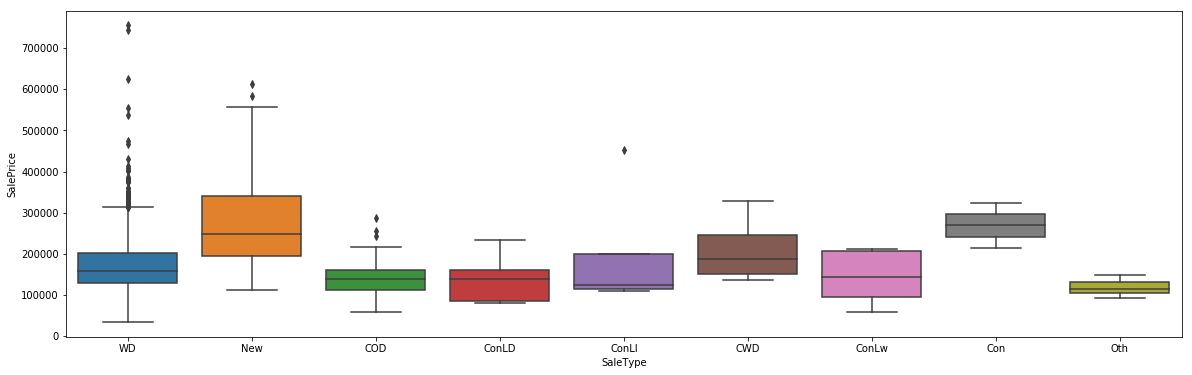

SaleCondition


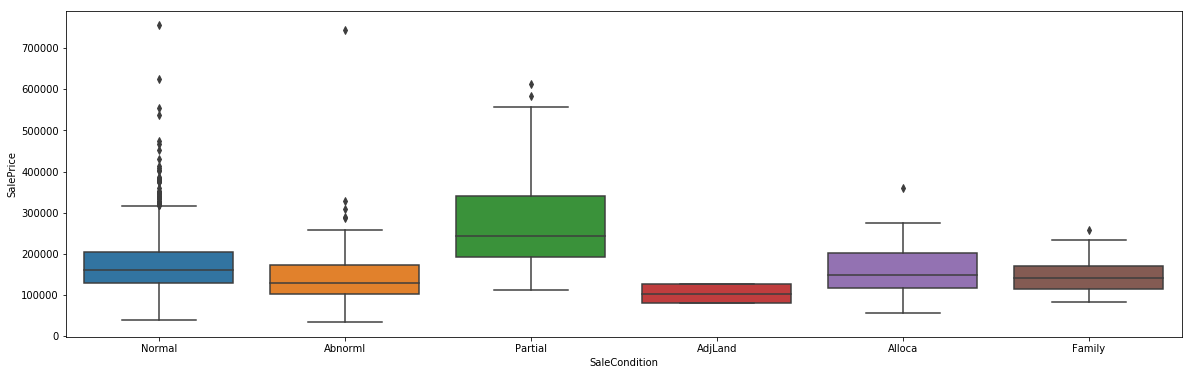

In [8]:
for col, dtype in train_data.dtypes[1:-1].items():
    if(dtype == 'object'):
        print(col)
        plt.figure(figsize=(20,6))
        sns.boxplot(x=col, y="SalePrice", data=train_data)
        plt.show()

---
## Target Variable (SalePrice) Study

Before Transformation:


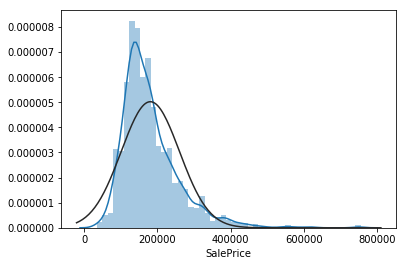

After Transformation:


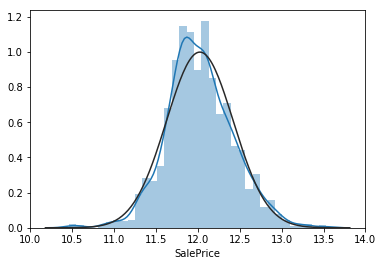

In [9]:
## Doing Log Transformation to target variable
print("Before Transformation:")
sns.distplot(train_data['SalePrice'], fit=stats.norm)
plt.show()

print("After Transformation:")
train_data["SalePrice"] = np.log1p(train_data["SalePrice"])
sns.distplot(train_data['SalePrice'], fit=stats.norm)
plt.show()

---
## Detail relationship study between transformed target variable and input features

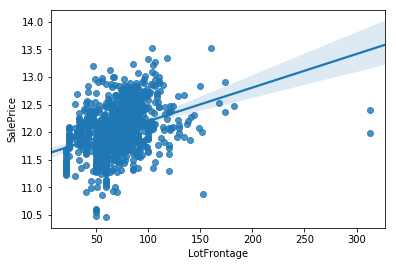

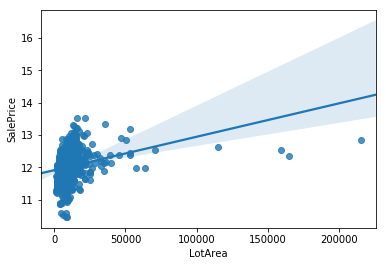

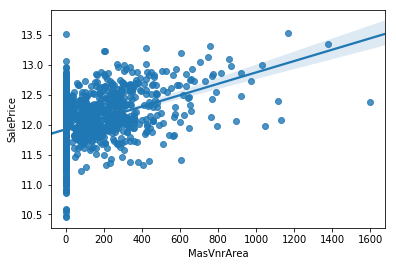

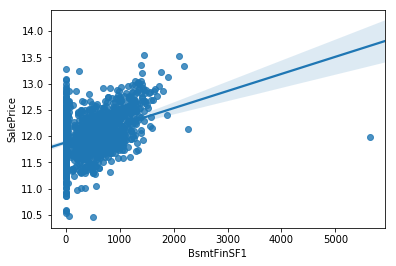

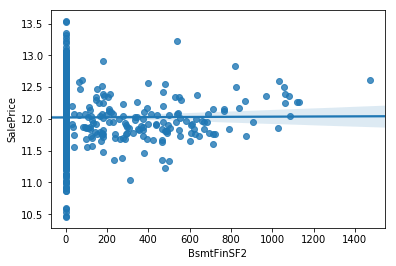

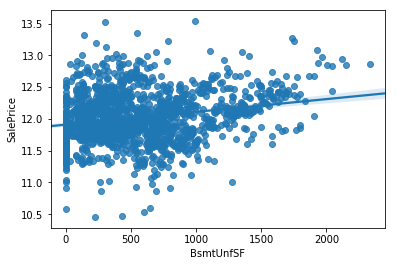

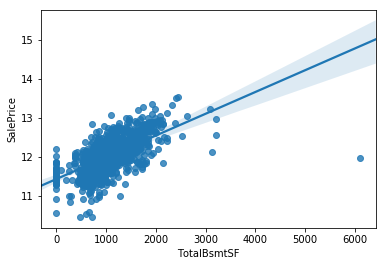

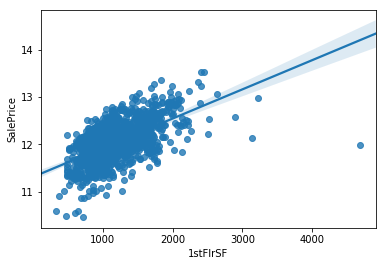

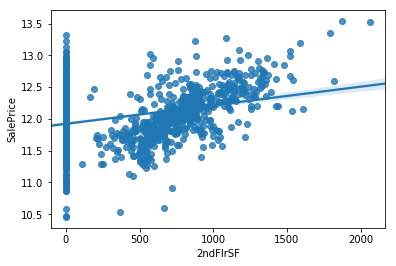

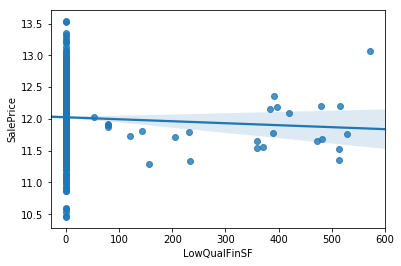

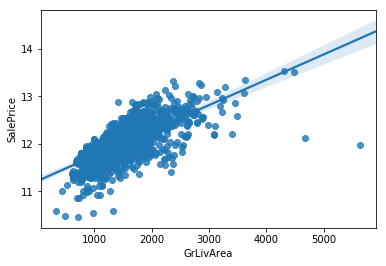

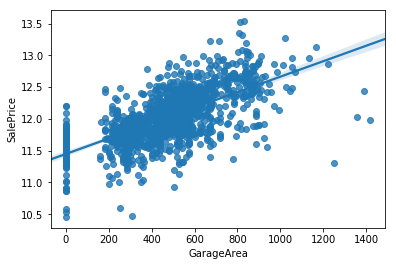

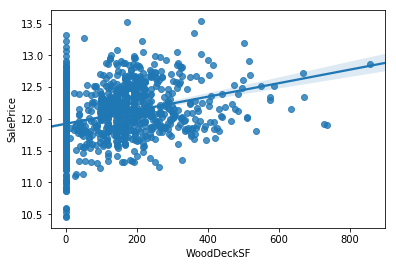

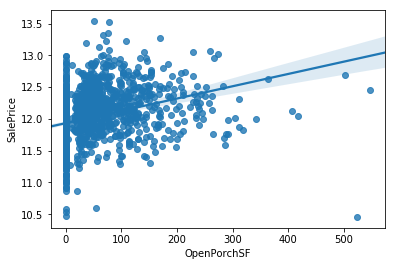

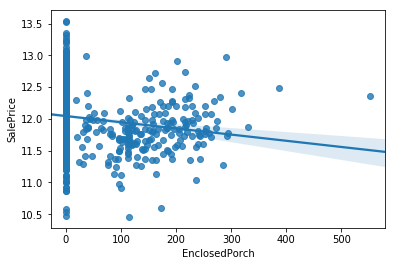

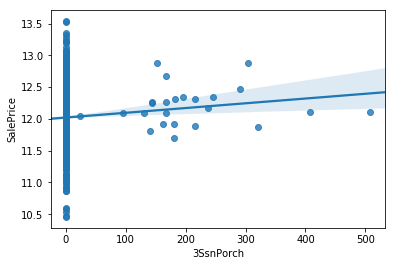

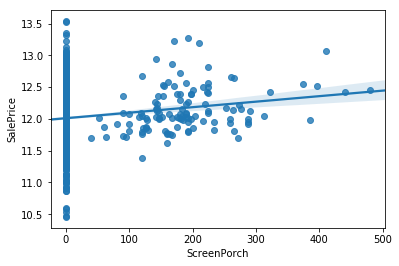

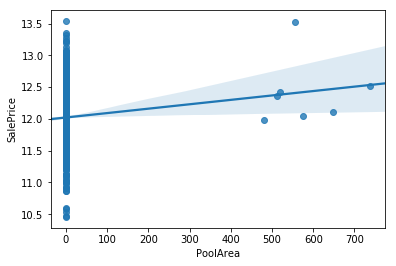

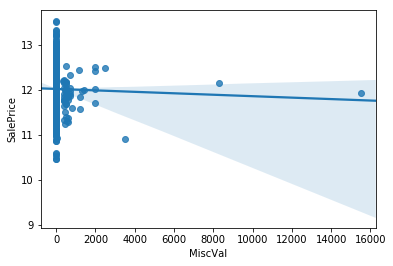

In [10]:
## Analysis to the input variable again
for col, dtype in train_data.dtypes[1:-1].items():
    if(dtype != 'object'):
        sns.regplot(x=col, y="SalePrice", data=train_data)
        plt.show()

MSSubClass


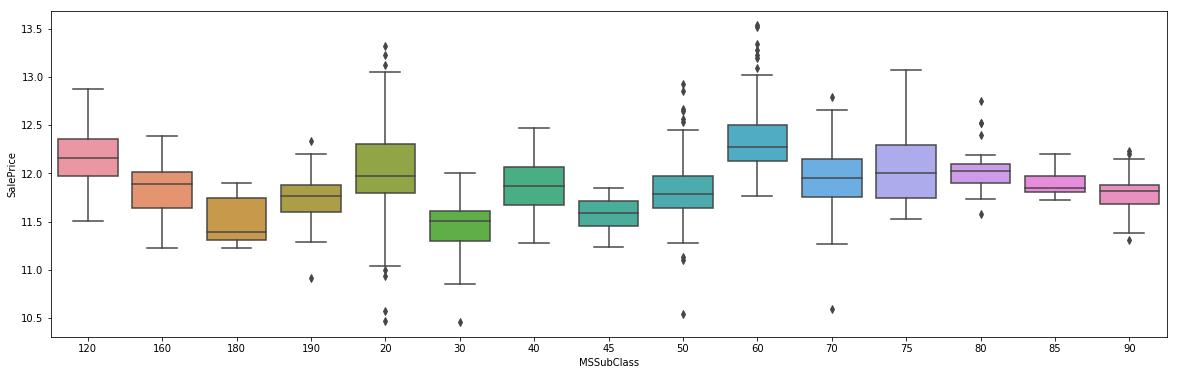

MSZoning


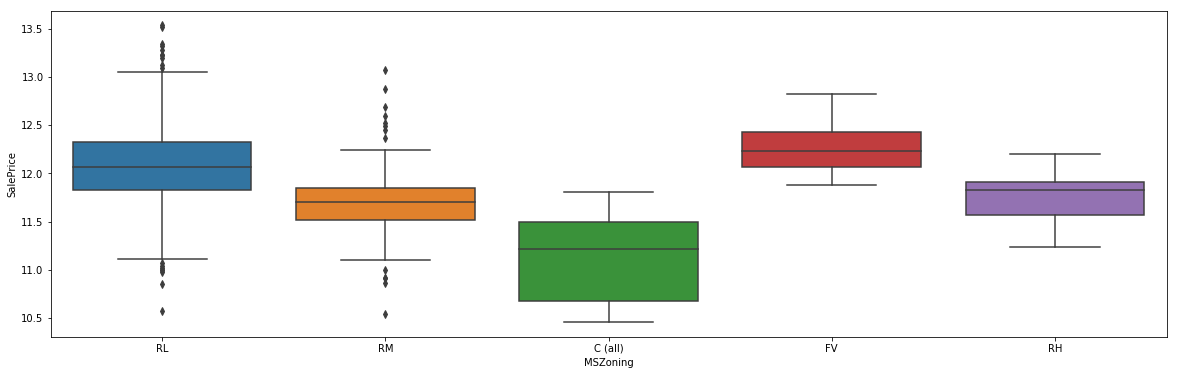

Street


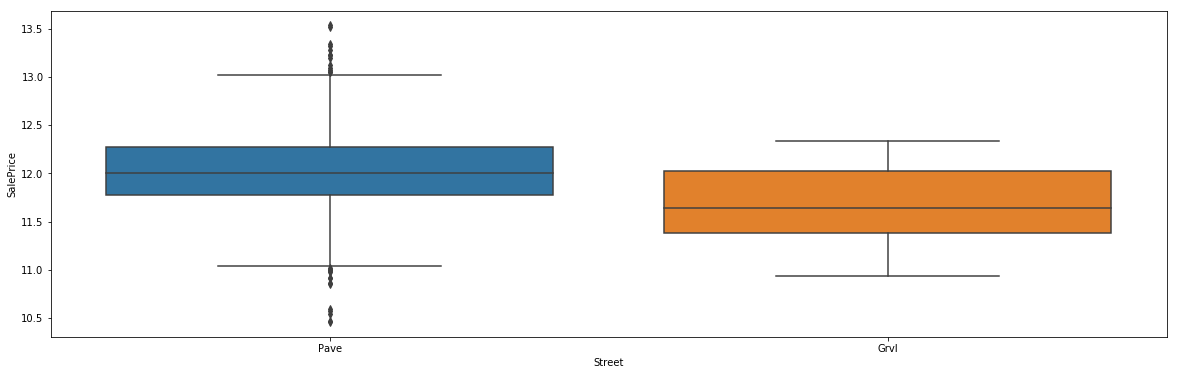

Alley


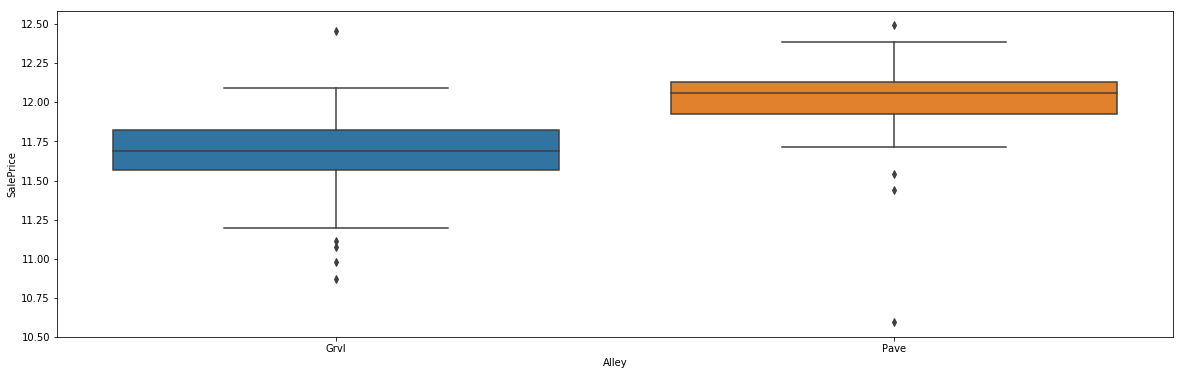

LotShape


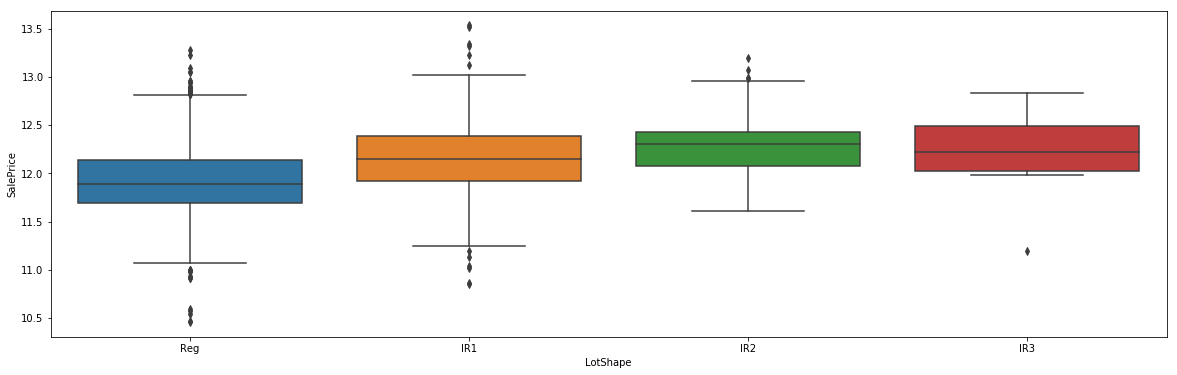

LandContour


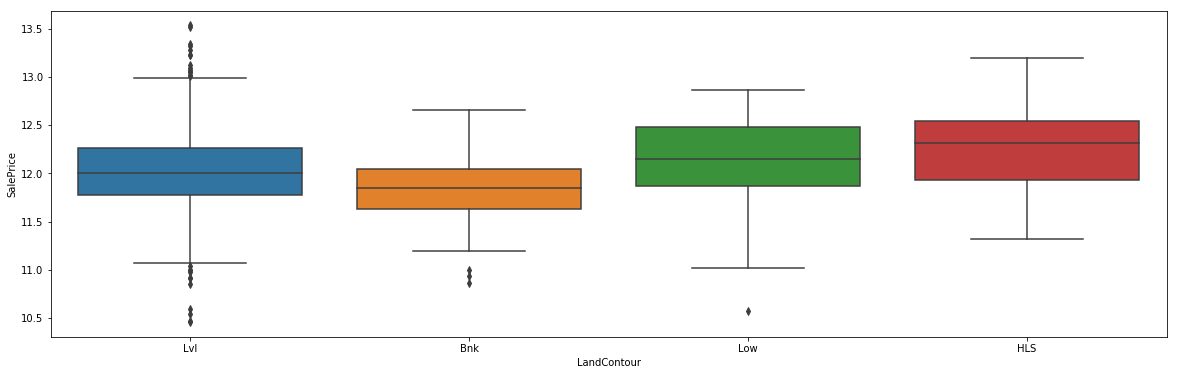

Utilities


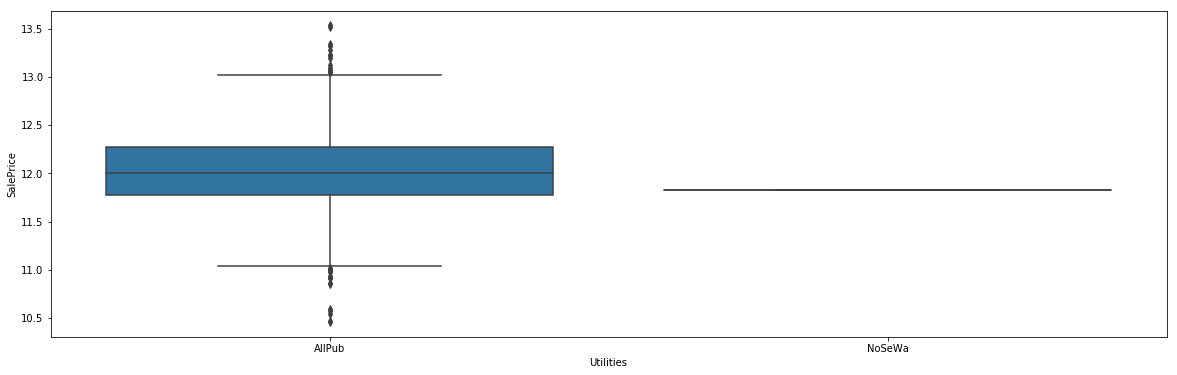

LotConfig


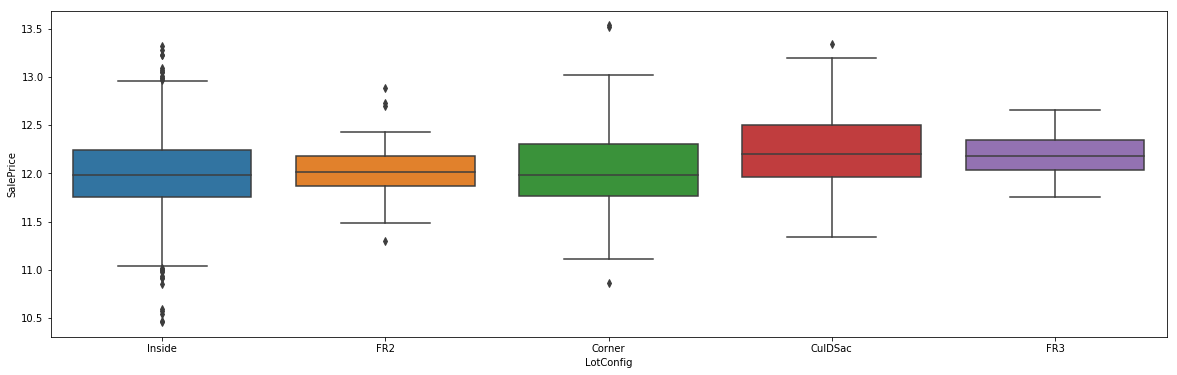

LandSlope


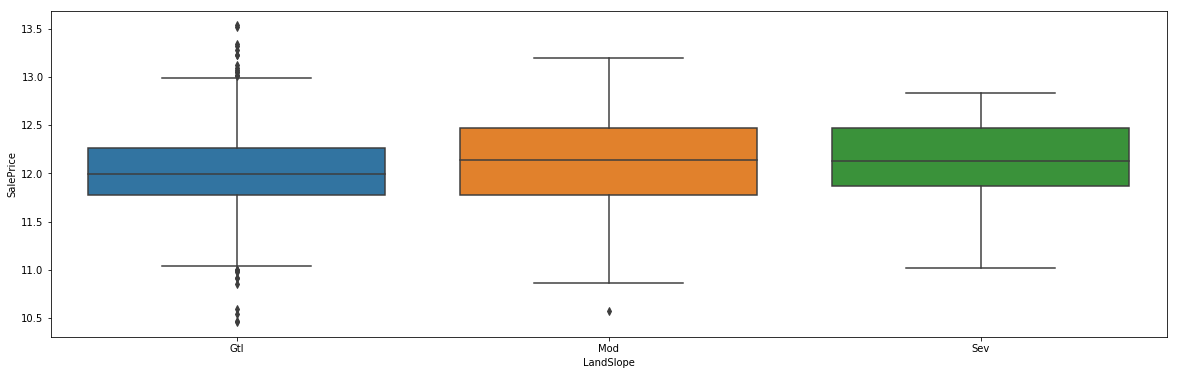

Neighborhood


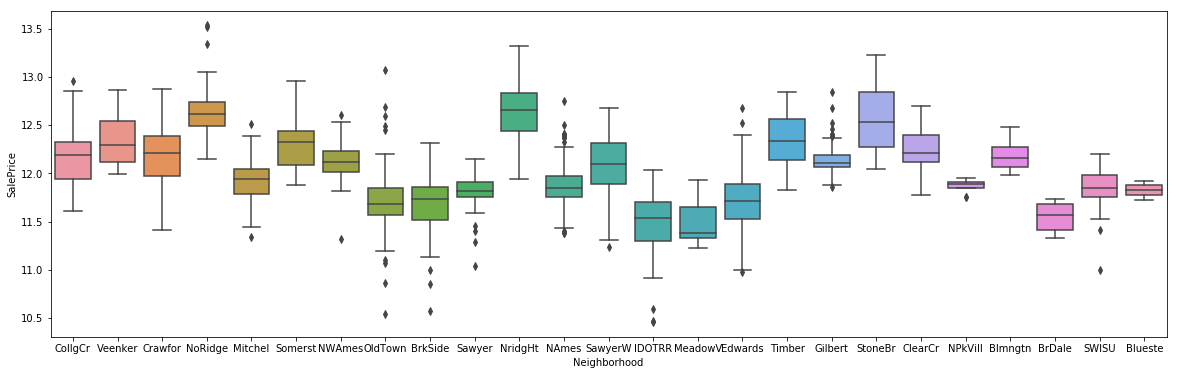

Condition1


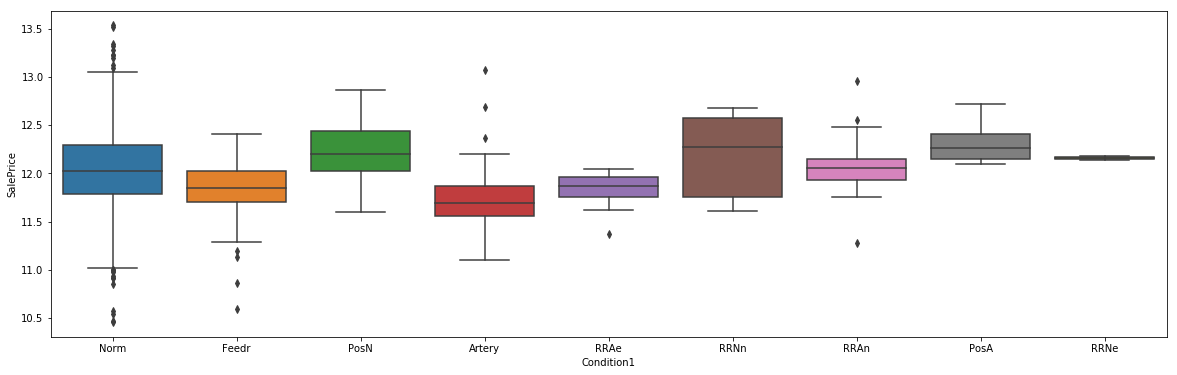

Condition2


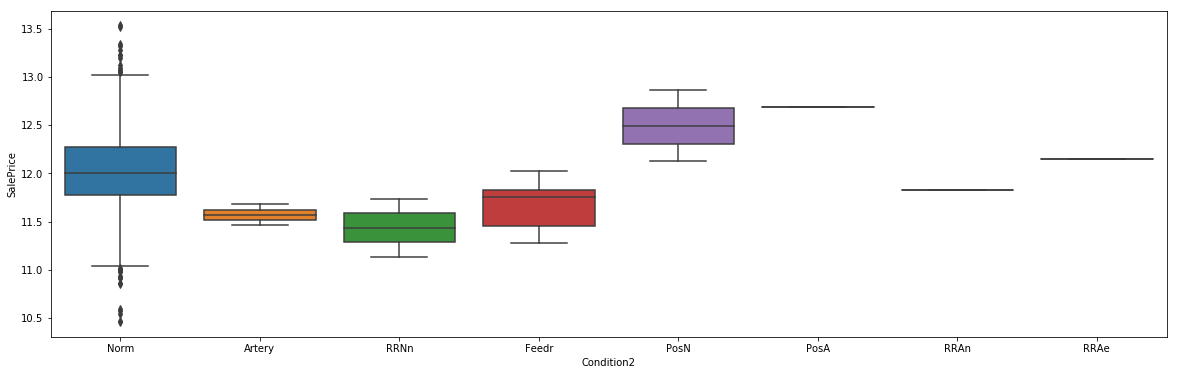

BldgType


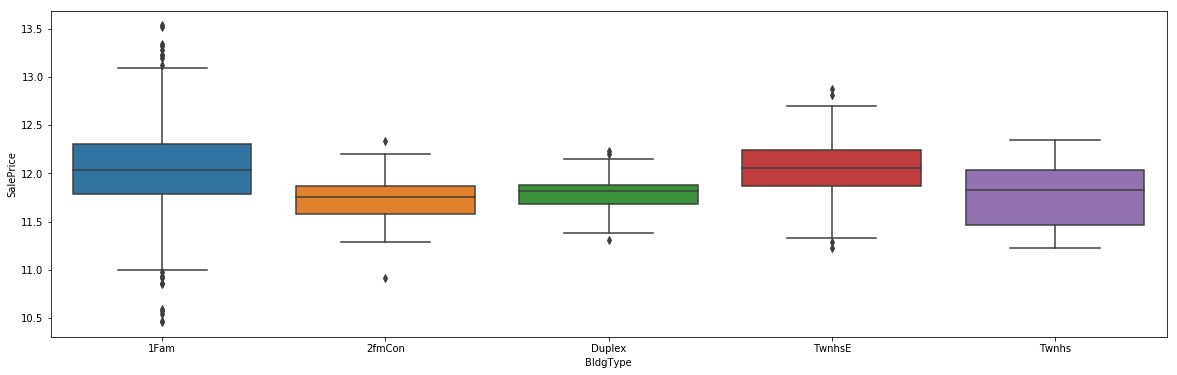

HouseStyle


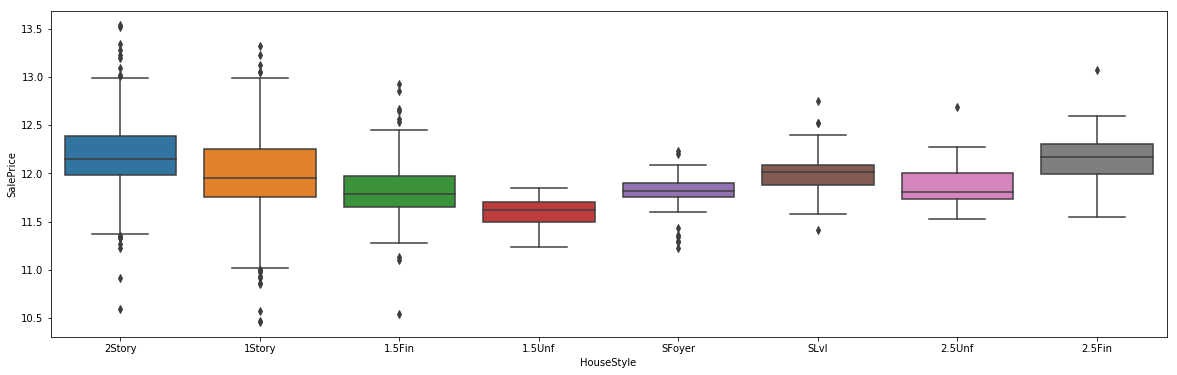

OverallQual


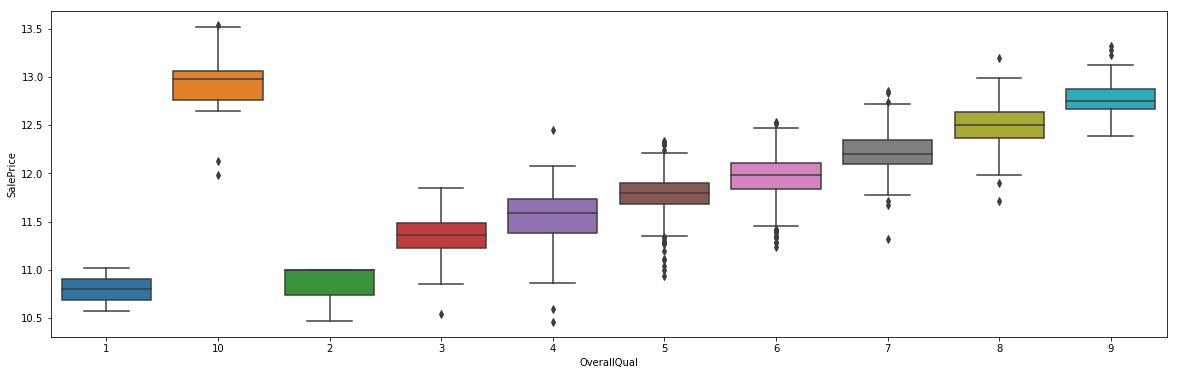

OverallCond


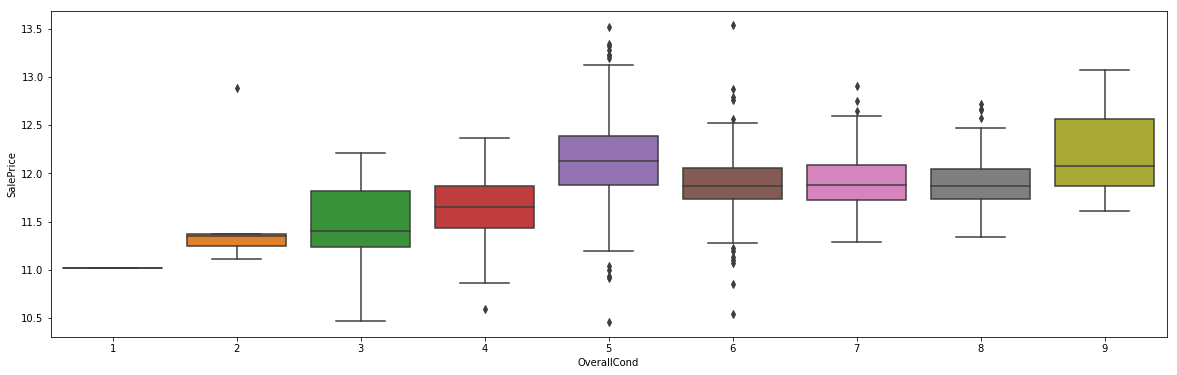

YearBuilt


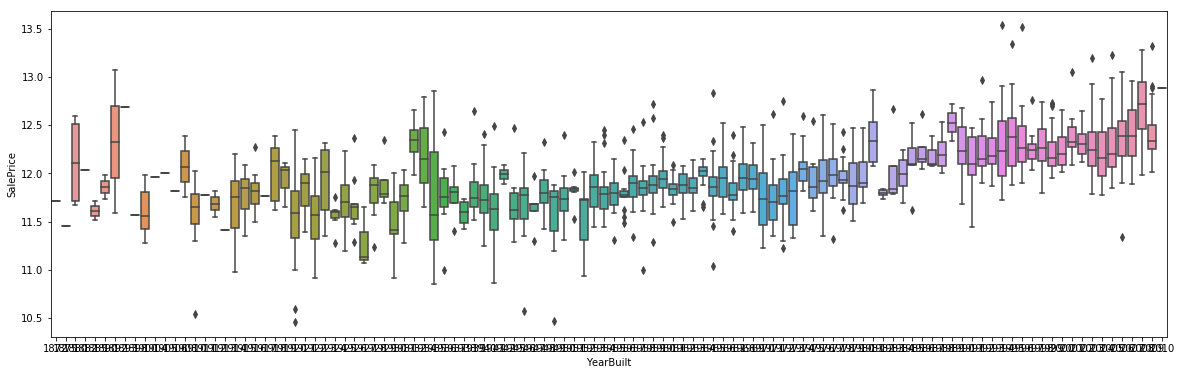

YearRemodAdd


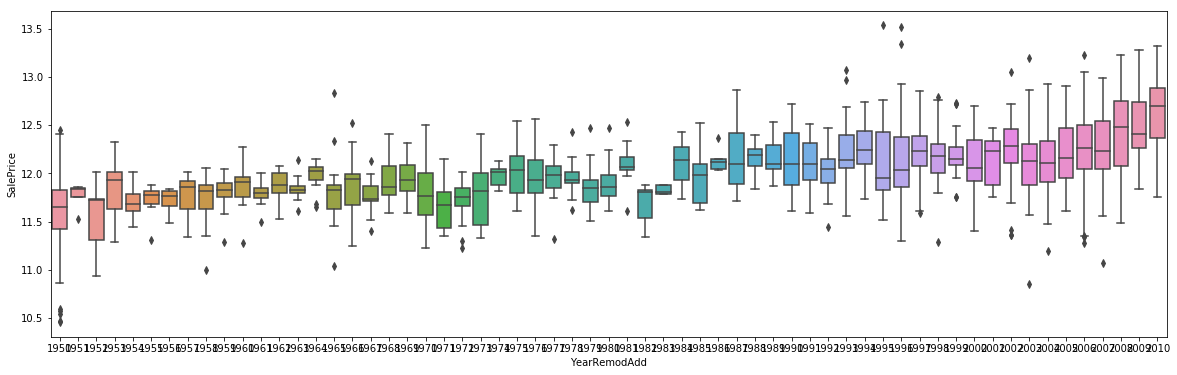

RoofStyle


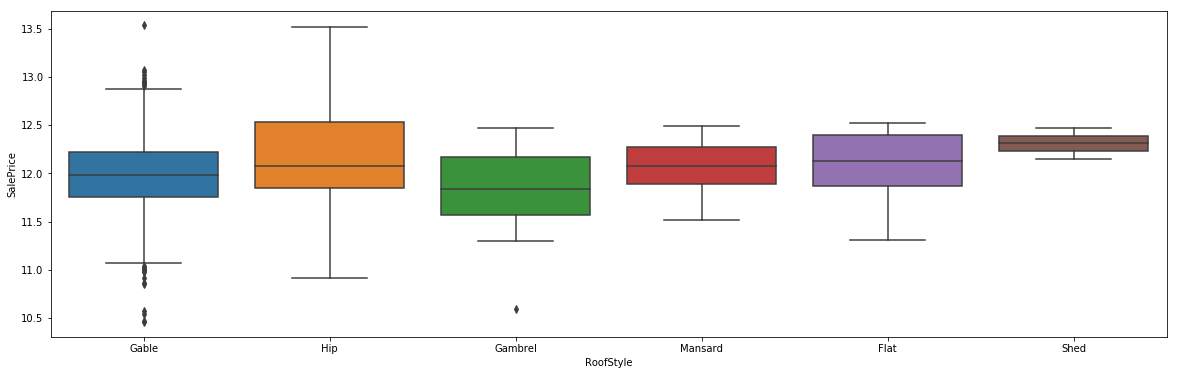

RoofMatl


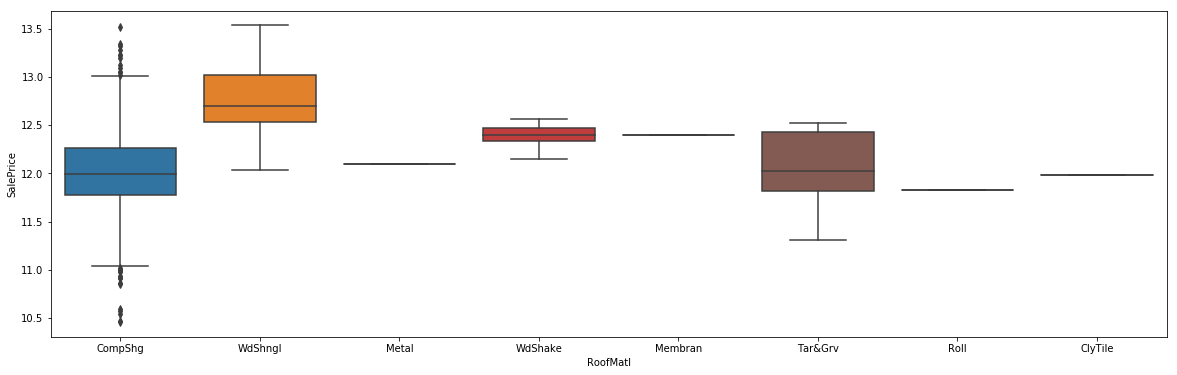

Exterior1st


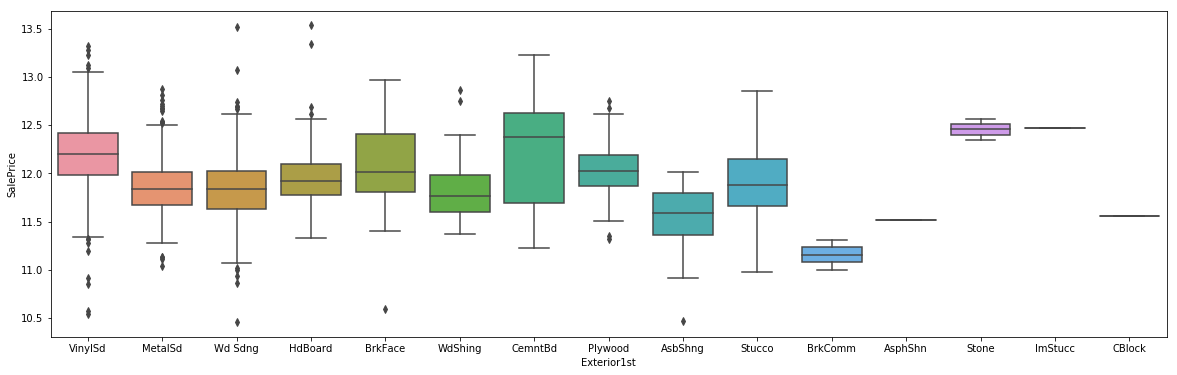

Exterior2nd


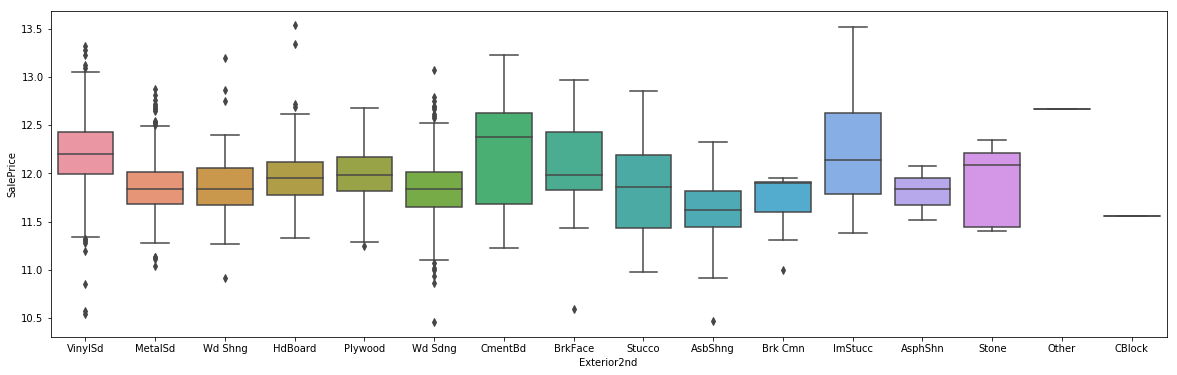

MasVnrType


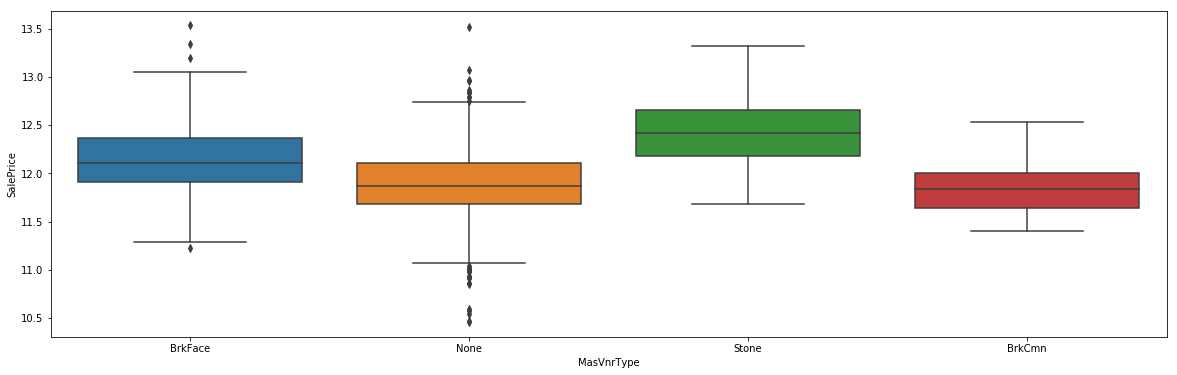

ExterQual


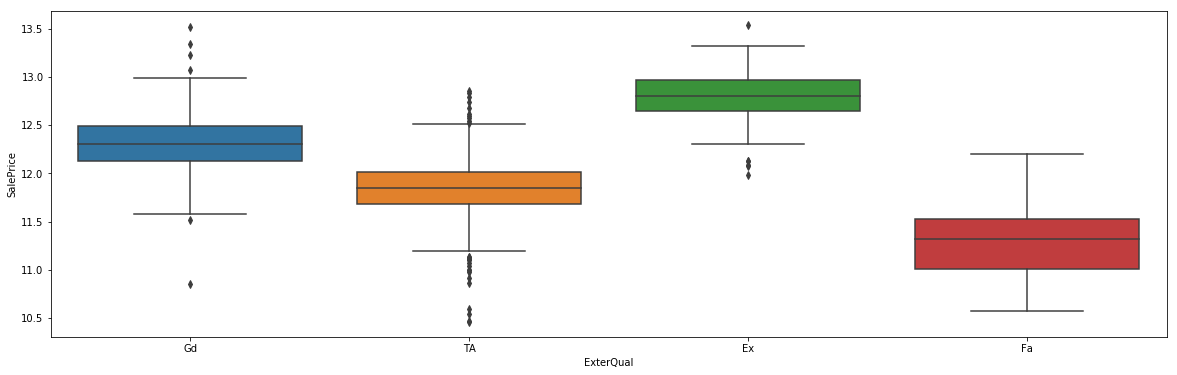

ExterCond


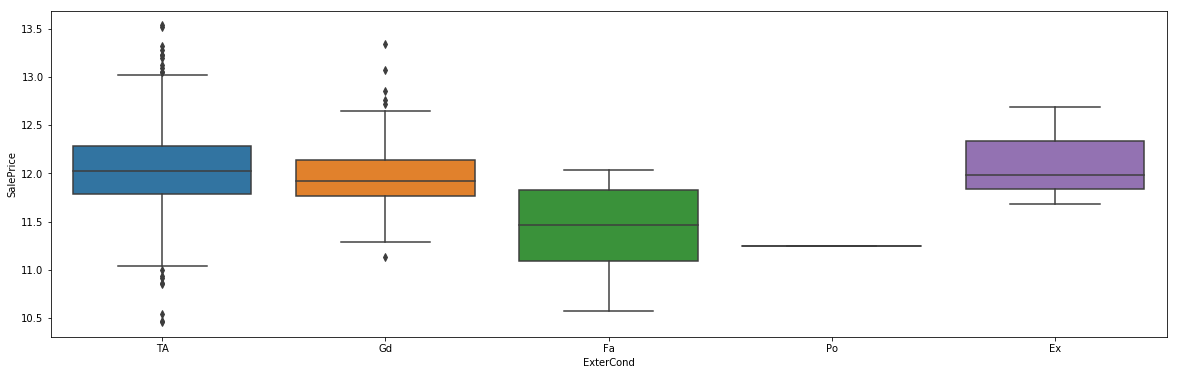

Foundation


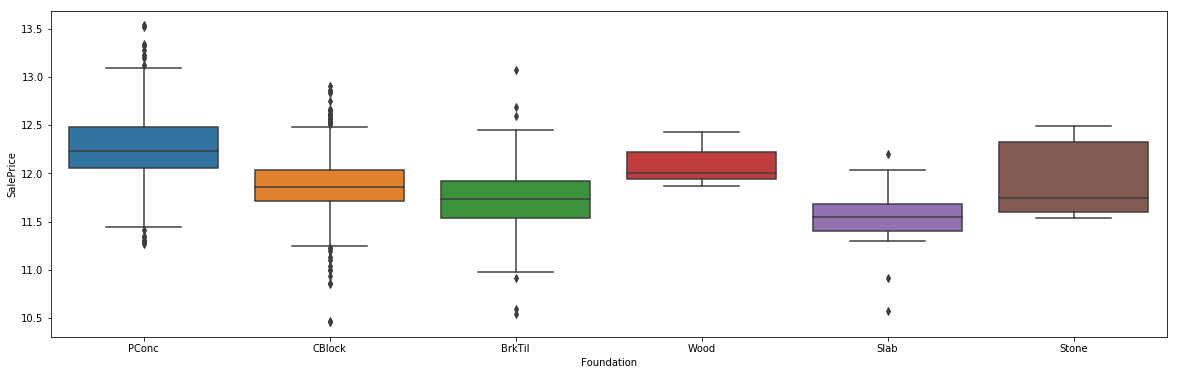

BsmtQual


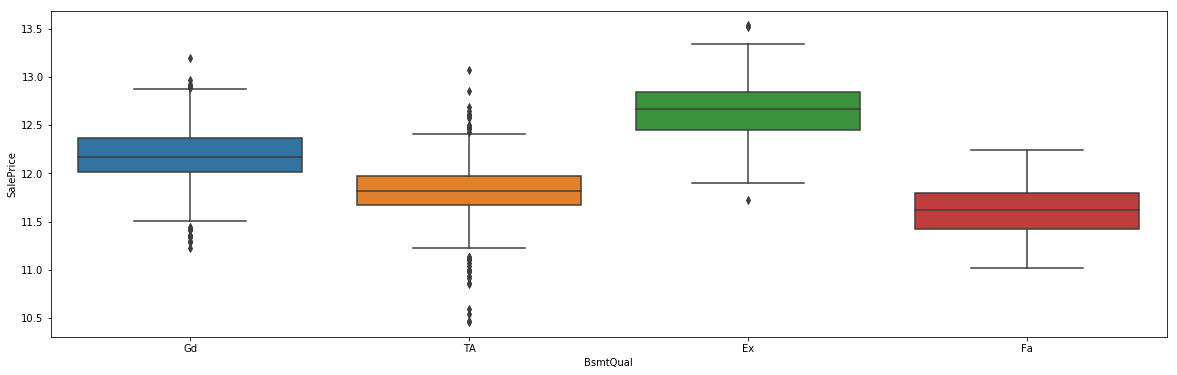

BsmtCond


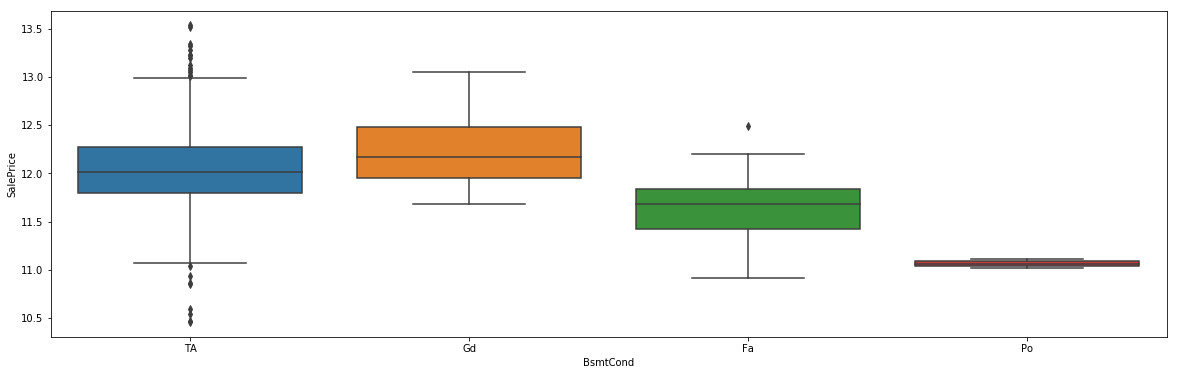

BsmtExposure


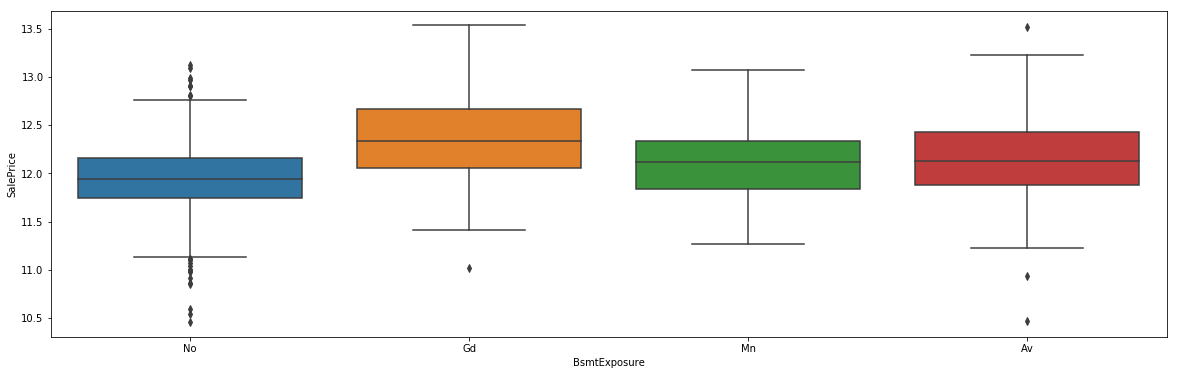

BsmtFinType1


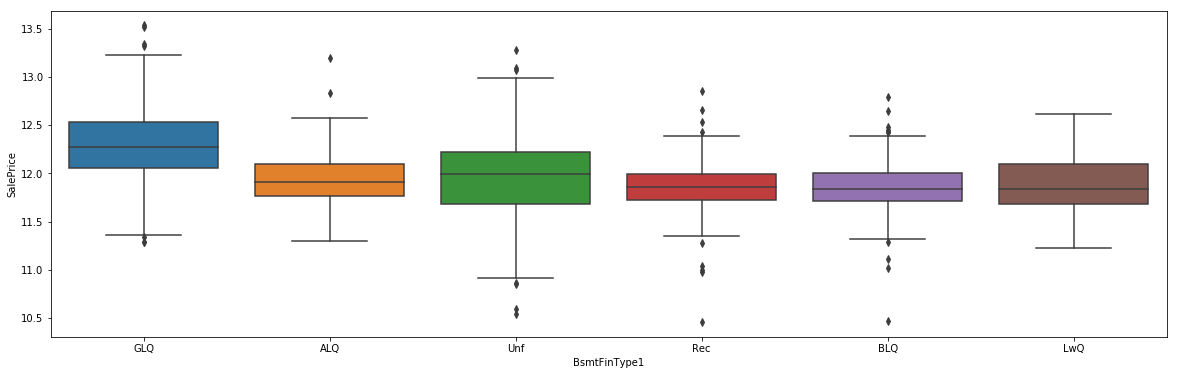

BsmtFinType2


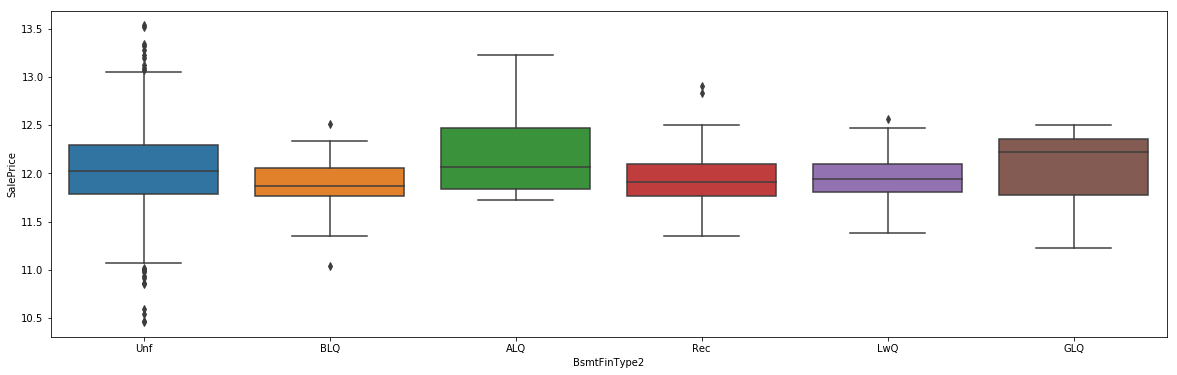

Heating


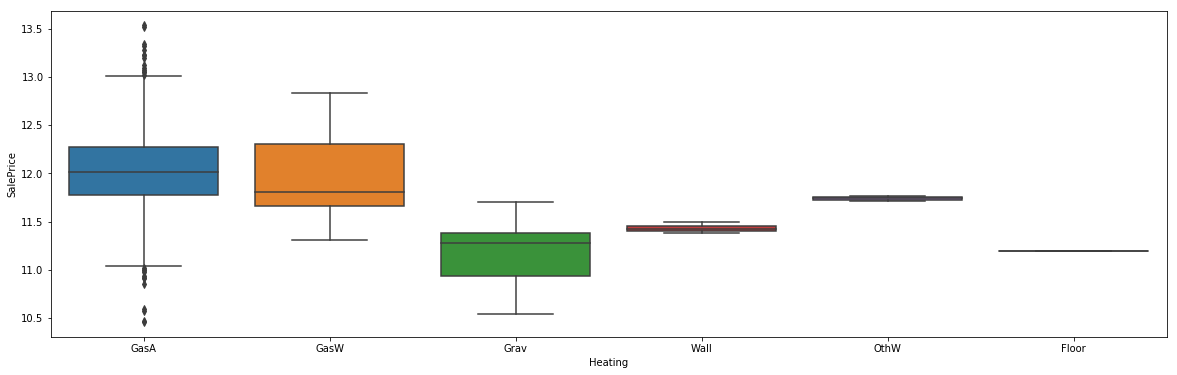

HeatingQC


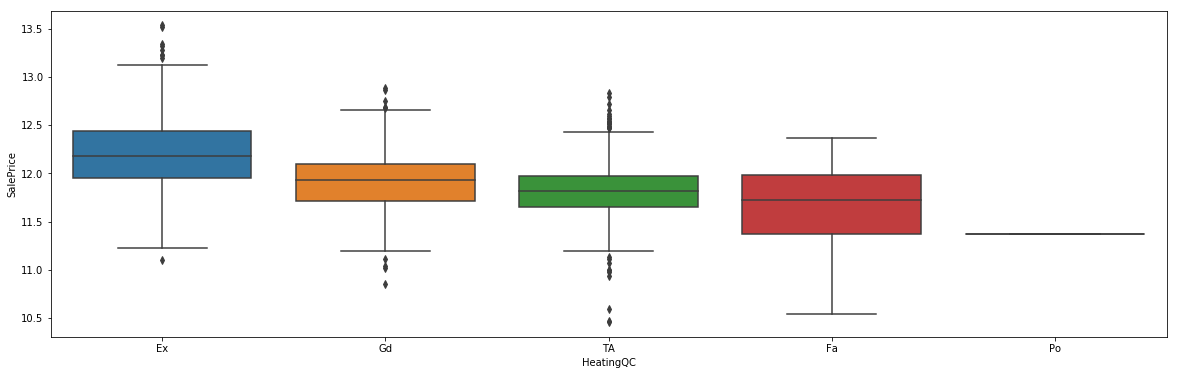

CentralAir


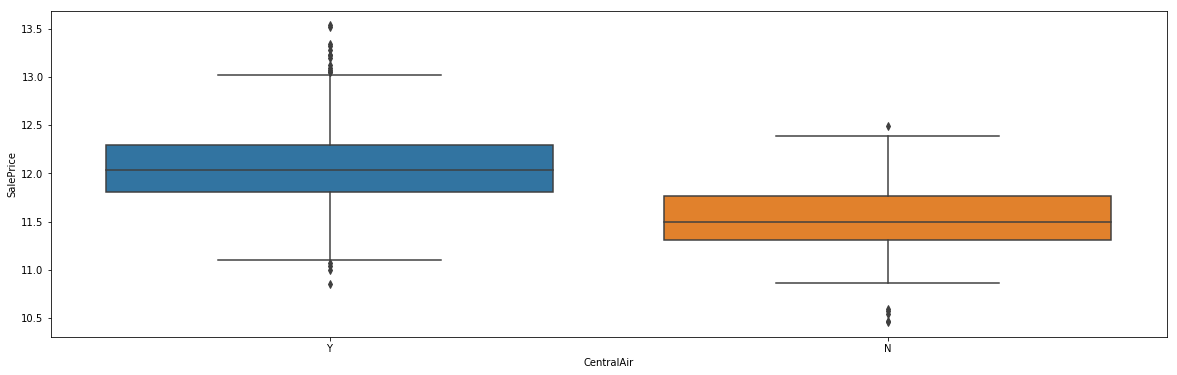

Electrical


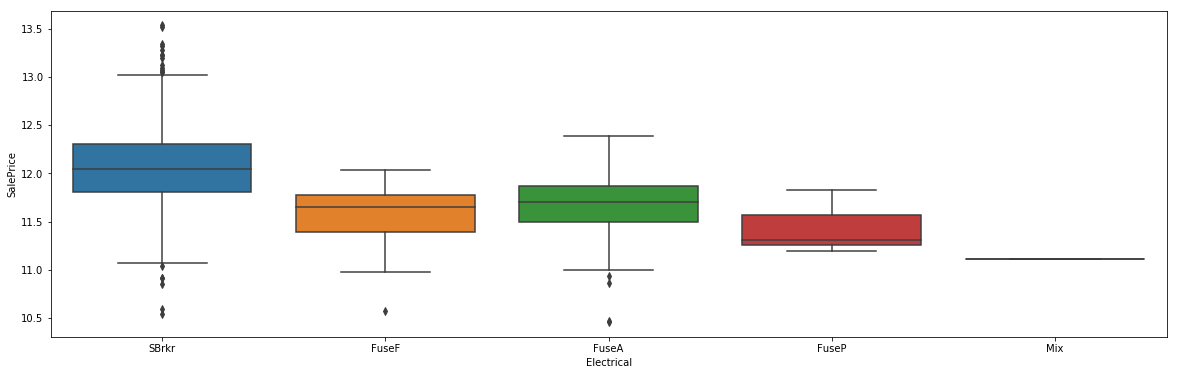

BsmtFullBath


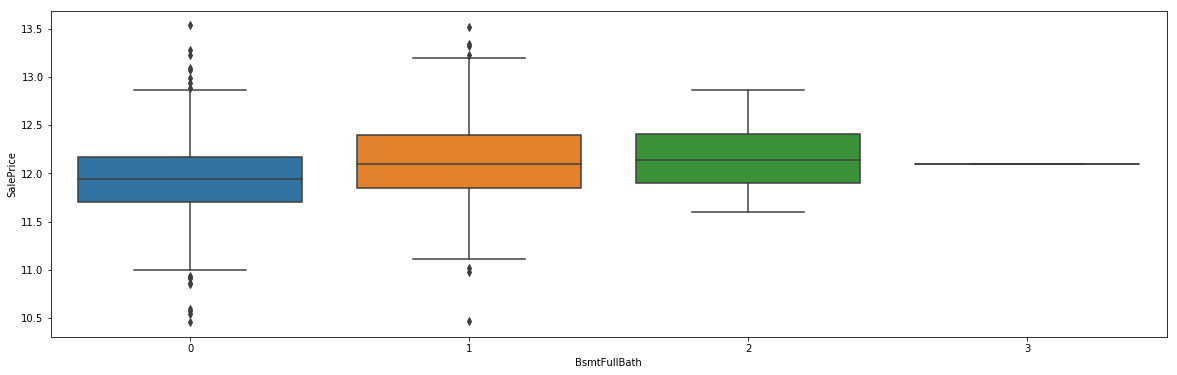

BsmtHalfBath


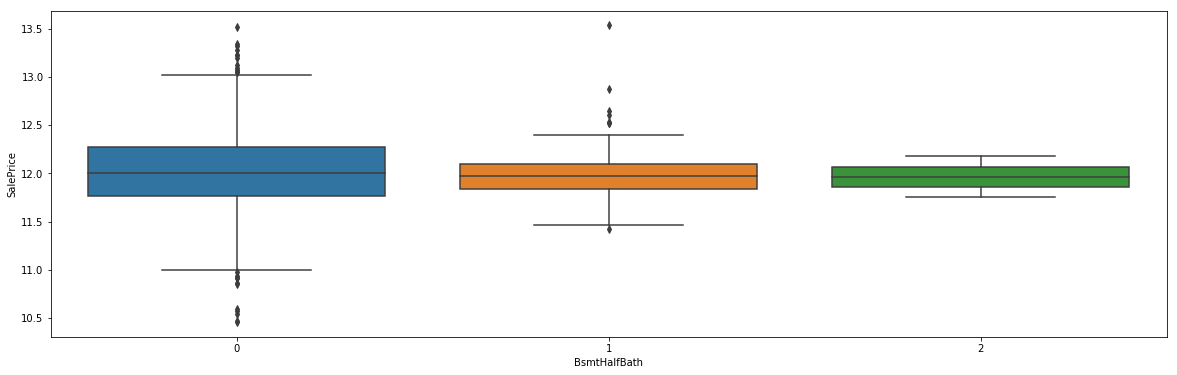

FullBath


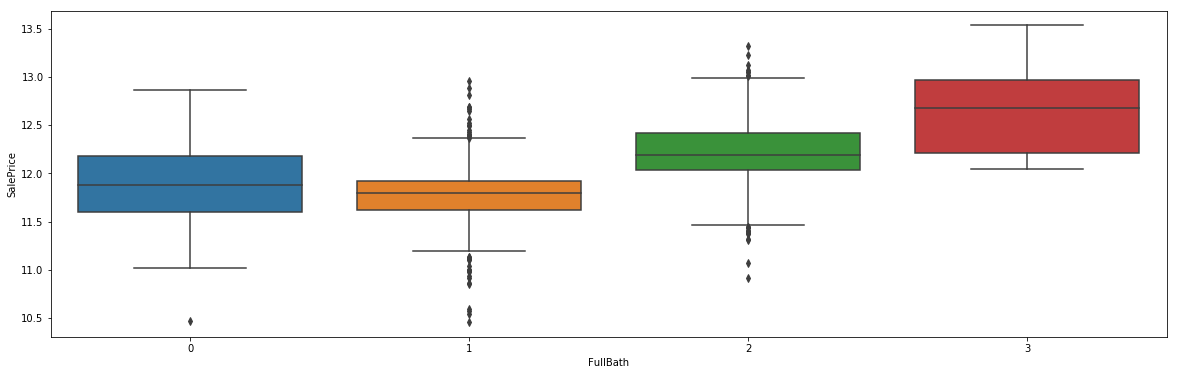

HalfBath


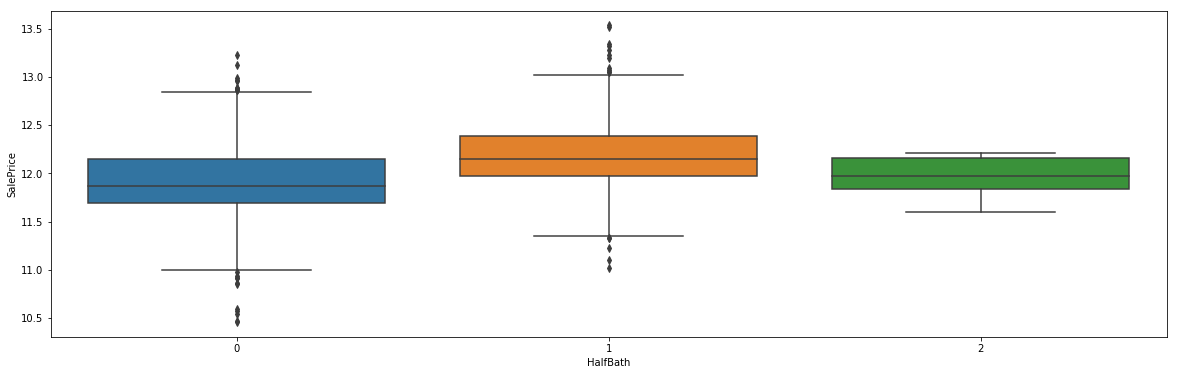

BedroomAbvGr


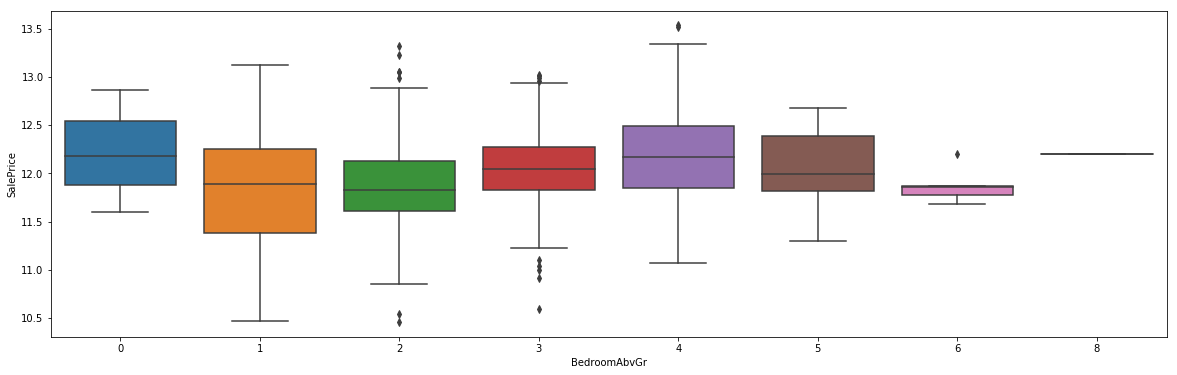

KitchenAbvGr


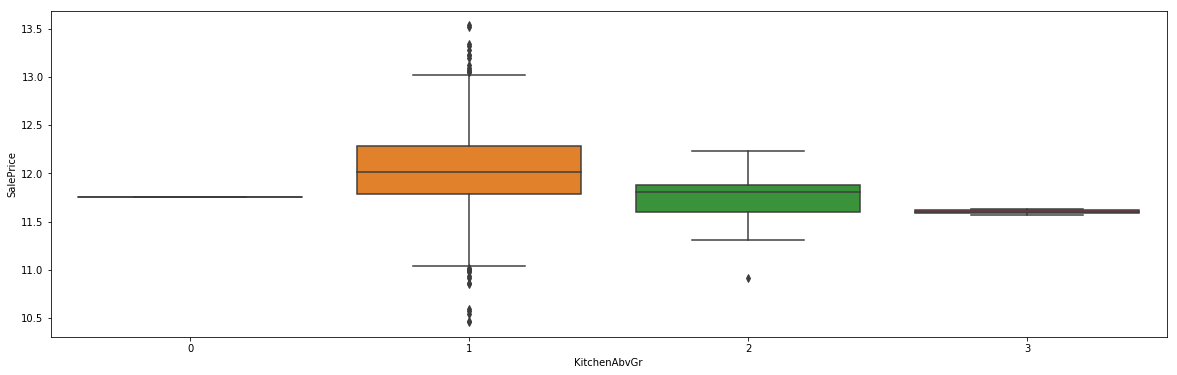

KitchenQual


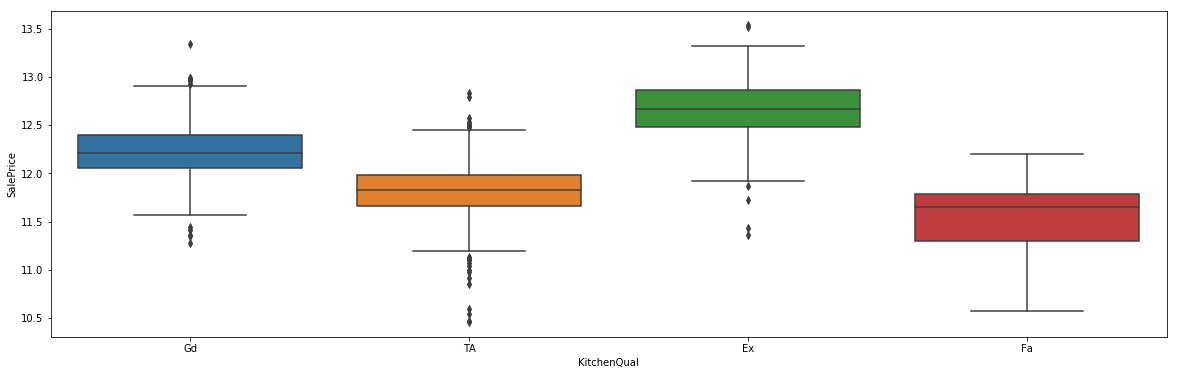

TotRmsAbvGrd


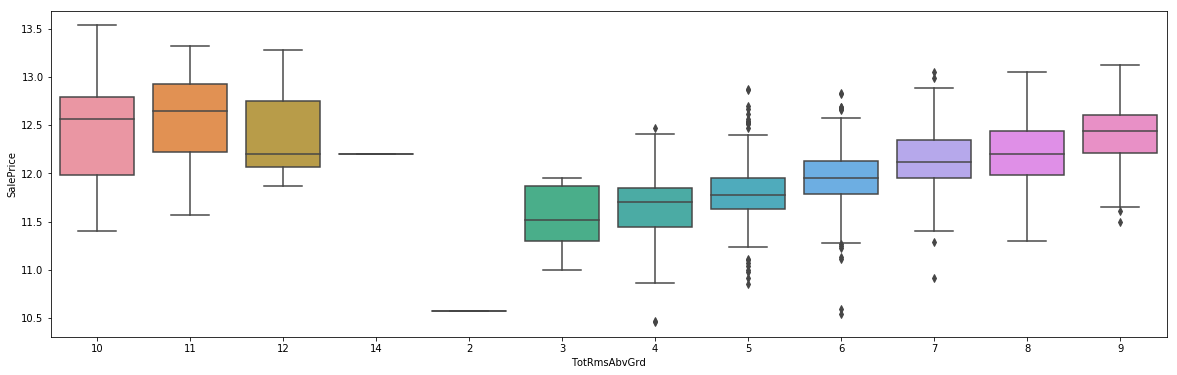

Functional


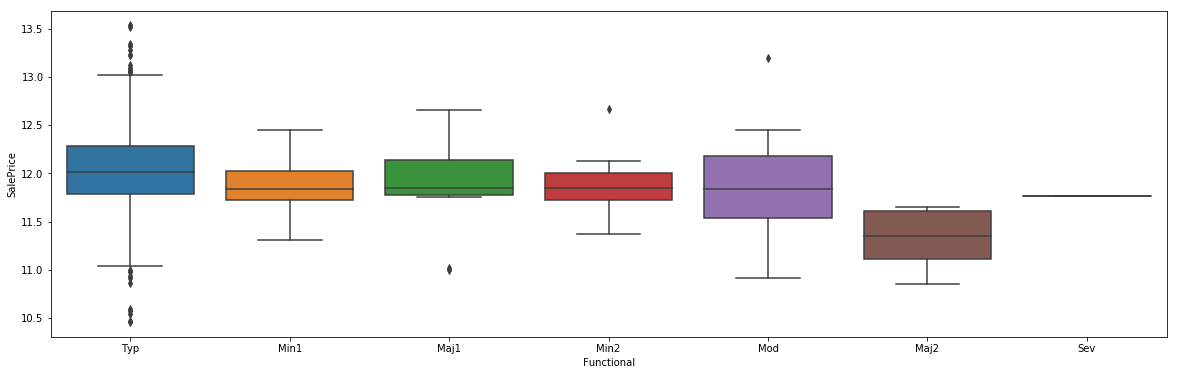

Fireplaces


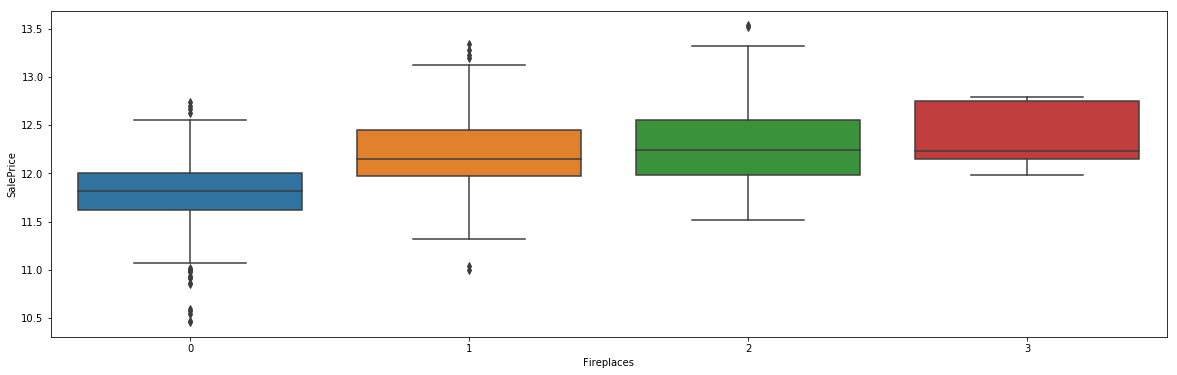

FireplaceQu


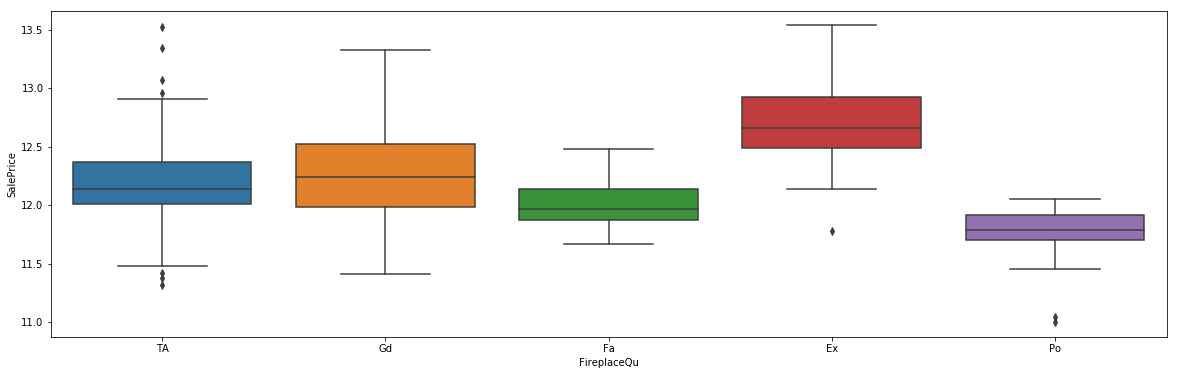

GarageType


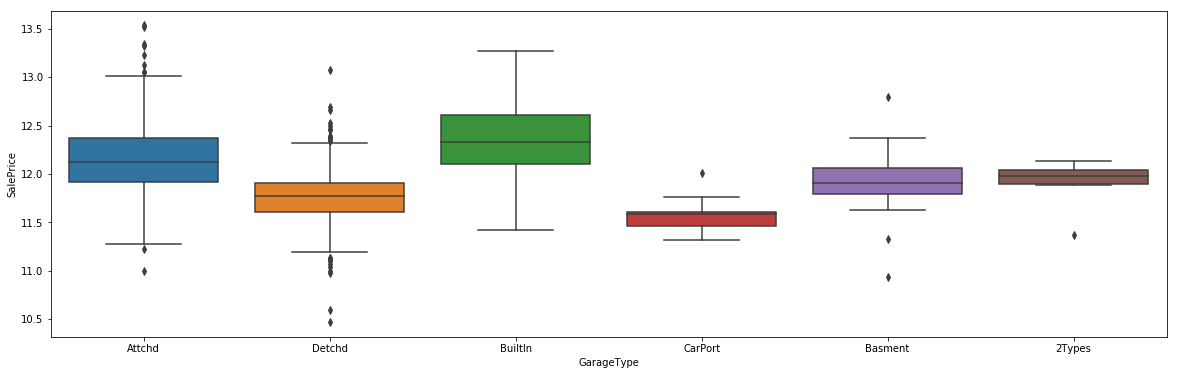

GarageYrBlt


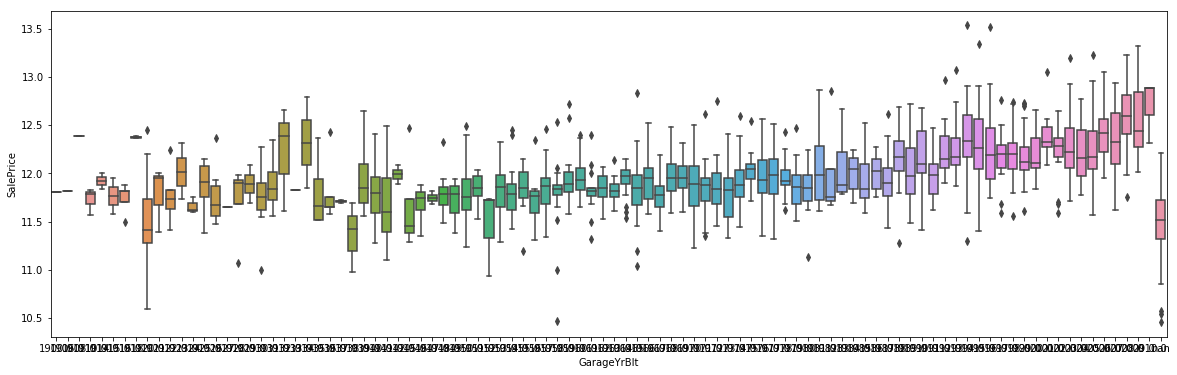

GarageFinish


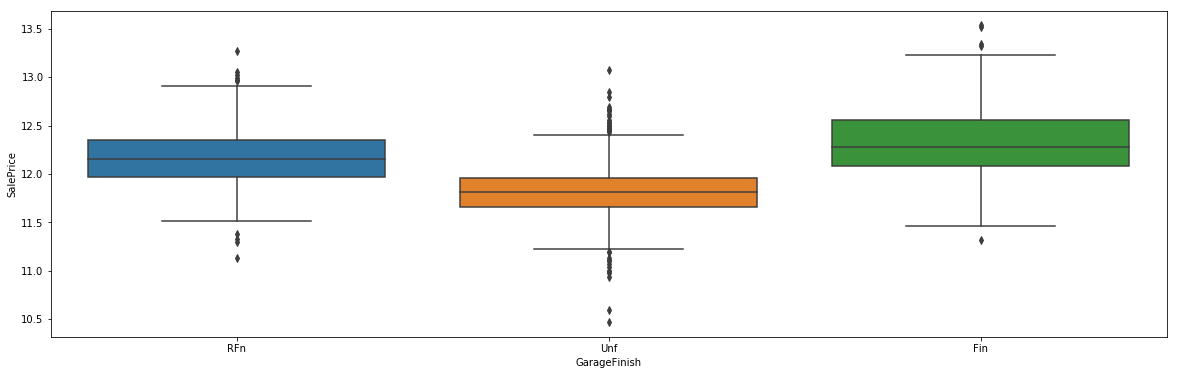

GarageCars


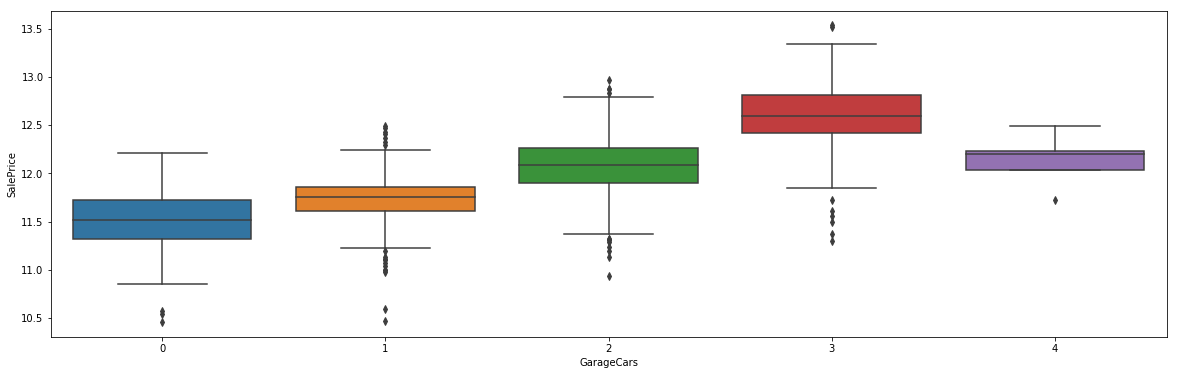

GarageQual


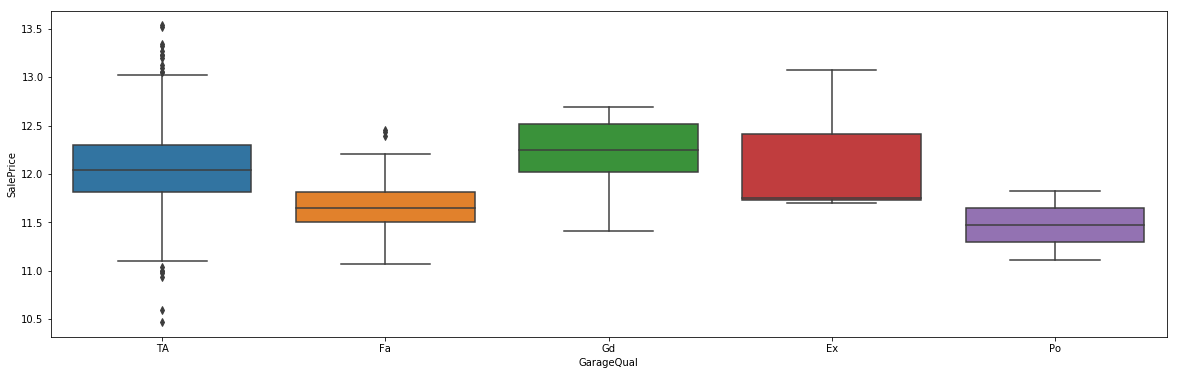

GarageCond


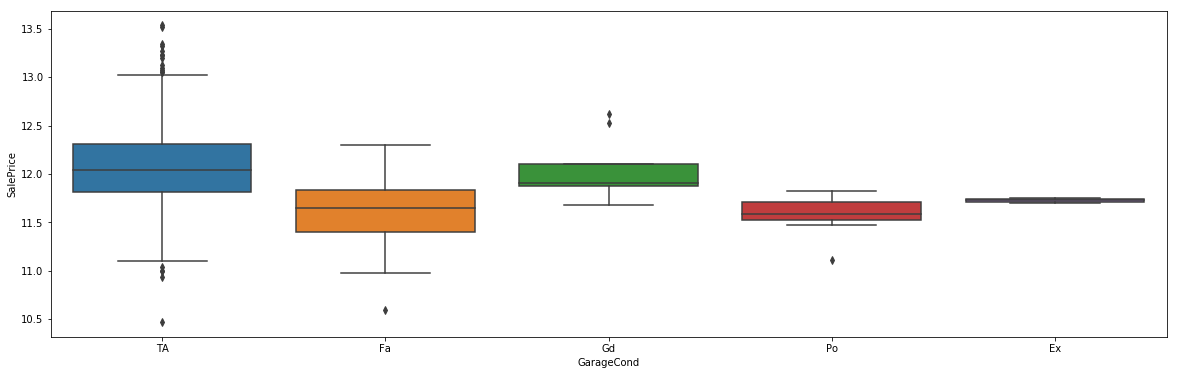

PavedDrive


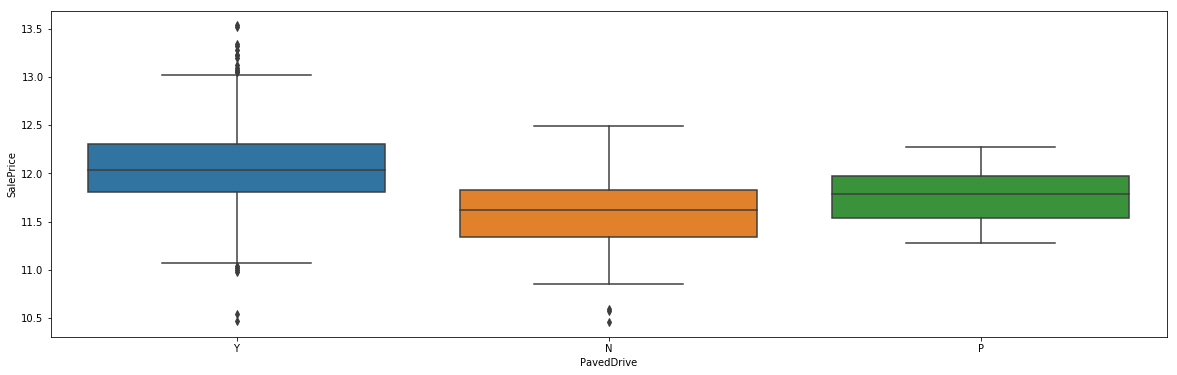

PoolQC


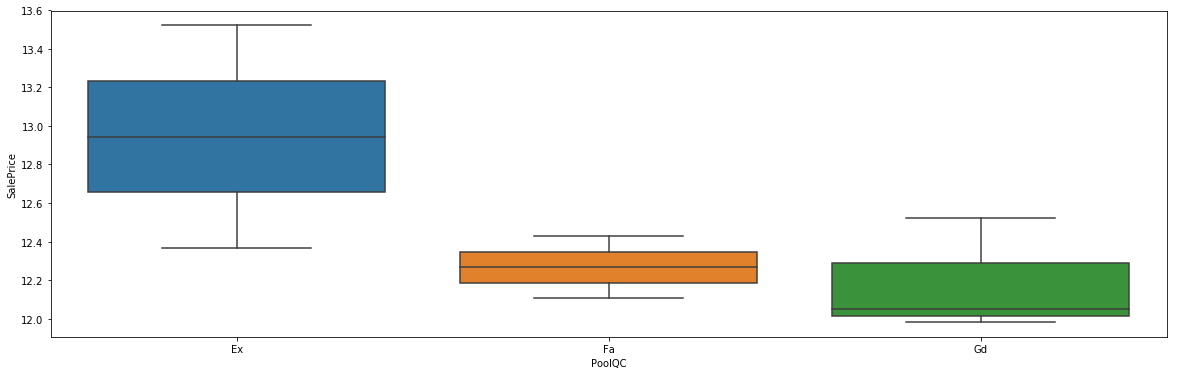

Fence


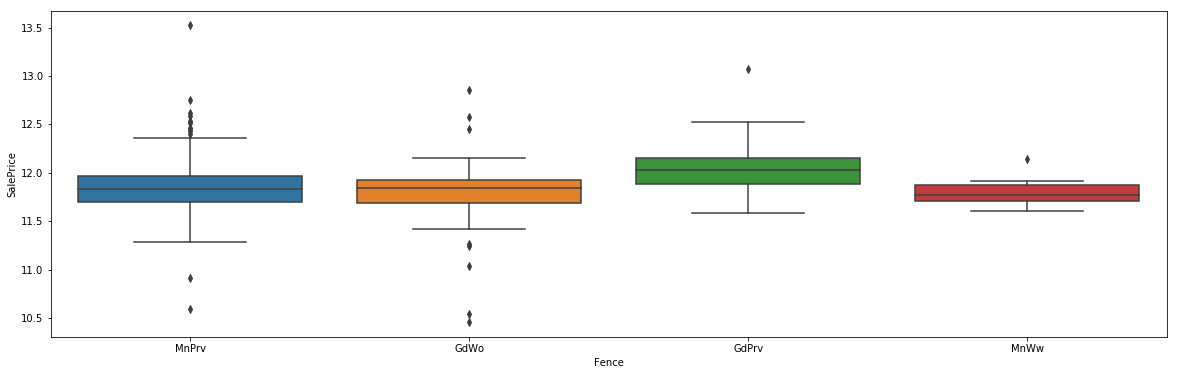

MiscFeature


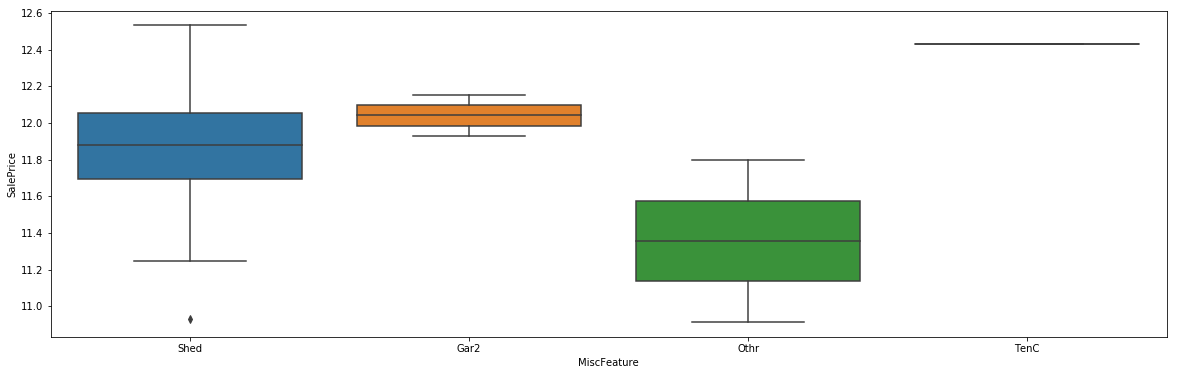

MoSold


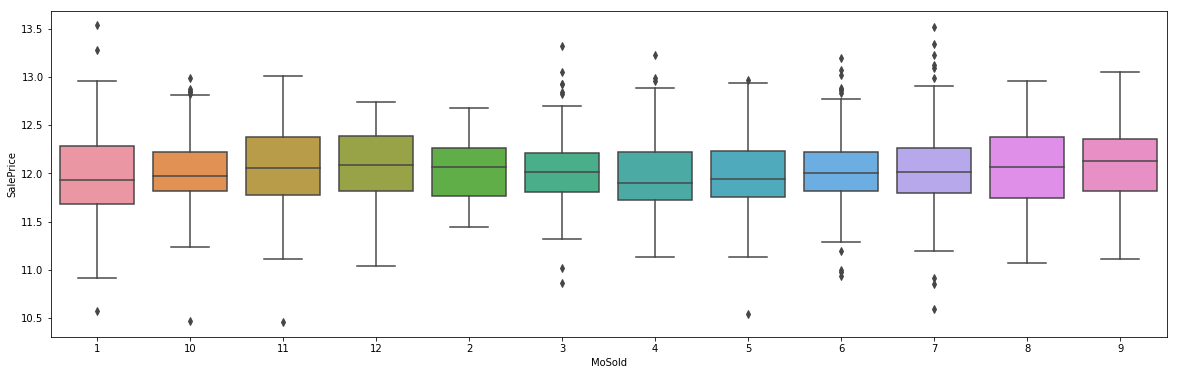

YrSold


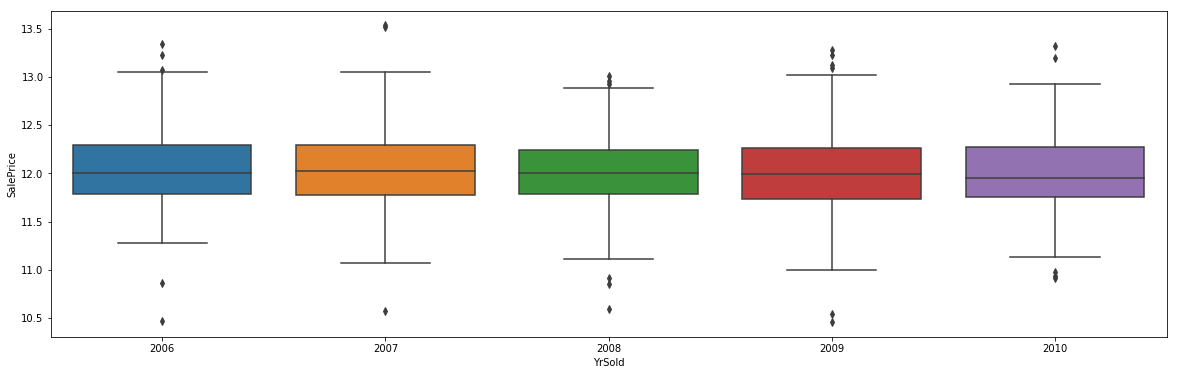

SaleType


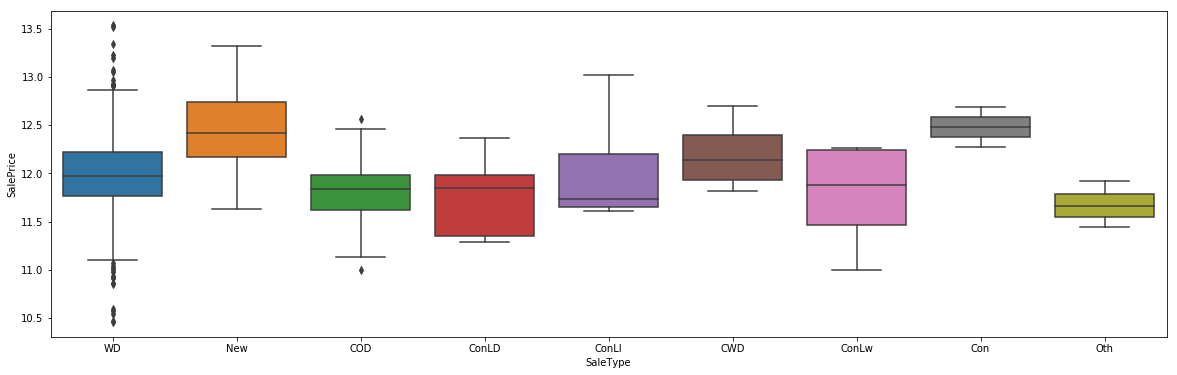

SaleCondition


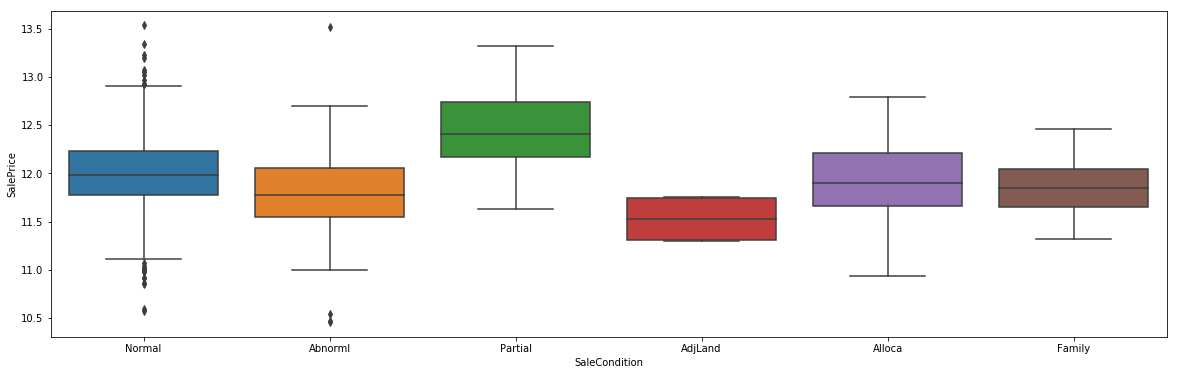

In [11]:
for col, dtype in train_data.dtypes[1:-1].items():
    if(dtype == 'object'):
        print(col)
        plt.figure(figsize=(20,6))
        sns.boxplot(x=col, y="SalePrice", data=train_data)
        plt.show()

---
## Input Features Study

Top 5 Skewness features:


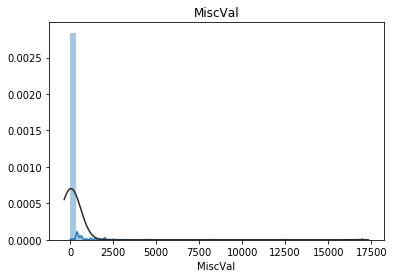

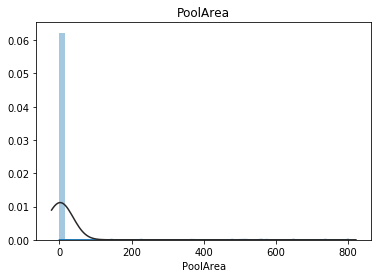

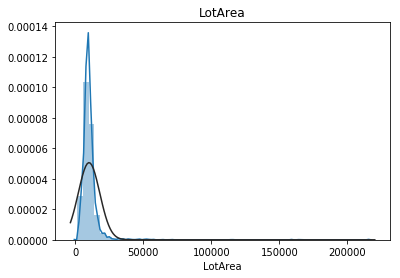

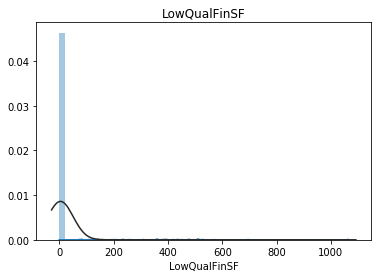

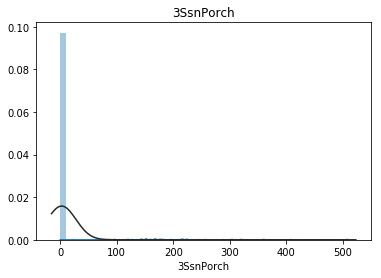

In [12]:
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = all_data[numeric_feats].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
print("Top 5 Skewness features:")
top_skewness = list(skewness.head(5).index)

for col in top_skewness:
    sns.distplot(all_data[col], fit=stats.norm)
    plt.title(col)
    plt.show()